# ETL for any data set

## Needed Libraries

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [375]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

## LOAD DATASET

In [376]:
df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df_original.sample(5)

C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16176\660363129.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
5366,1140275,165243,CHAUTAUQUA GUEST HOME #3,302 - 9TH STREET,CHARLES CITY,IA,50616,FLOYD,99916.0,R,1/1/2015,12/31/2015,4,206309.0,44000.0,704931.0,315743.0,467036.0,3225727.0,497667.0,3225727.0,3034533.0,172394.0,NaN,40392.0,18800.0,3053333.0,65.0,NaN,294584.0,1393202.0,33.0,28.0,37.0,98.0,167.39,343.53,33.92,6350.0,10306.0,1255.0,17911.0,40.0,30.0,37.0,107.0,65.0,23725.0,170718.0,978597.0,23725.0,304631.0,6350.0,10306.0,1255.0,17911.0,40.0,30.0,37.0,107.0,2663888.0,40392.0,978597.0,1255.0,1641331.0,1641331.0,728422.0,511561.0,250175.0,467036.0,511561.0,NaN,319343.0,492583.0
6431,1141541,396080,BELLE REVE HEALTH CARE CENTER,404 EAST HARTFORD STREET,MILFORD,PA,18337,PIKE,35084.0,U,12/18/2014,12/31/2015,4,770241.0,175137.0,NaN,-48637.0,396265.0,6502162.0,2142433.0,6502162.0,6017522.0,61648.0,NaN,463863.0,422992.0,6440514.0,95.0,NaN,NaN,3376714.0,23.0,2.0,151.0,176.0,56.96,852.25,27.34,2928.0,3409.0,3745.0,10082.0,36.0,4.0,137.0,177.0,30.0,22320.0,134611.0,713563.0,22320.0,797297.0,22825.0,3409.0,3745.0,29979.0,36.0,4.0,137.0,177.0,5723249.0,463863.0,713563.0,3745.0,2640808.0,2640808.0,687849.0,317298.0,25714.0,396265.0,317298.0,NaN,396351.0,30000.0
3729,1138320,175154,LEXINGTON PARK NURSING AND POST ACUT,1031 SW FLEMING COURT,TOPEKA,KS,66604,SHAWNEE,45820.0,U,1/1/2015,12/31/2015,4,677193.0,110621.0,NaN,102996.0,308284.0,11856207.0,4131518.0,11856207.0,8545394.0,3531969.0,NaN,-182127.0,-221156.0,8324238.0,90.0,-126602.0,99815.0,5175557.0,109.0,NaN,351.0,460.0,58.67,NaN,26.24,17635.0,NaN,9237.0,26872.0,106.0,NaN,352.0,458.0,90.0,32850.0,235567.0,785799.0,32850.0,2117162.0,17635.0,NaN,9237.0,26872.0,106.0,NaN,352.0,458.0,8034585.0,-182127.0,785799.0,9237.0,3311200.0,3311200.0,834522.0,477515.0,77879.0,308284.0,477515.0,-126602.0,478672.0,281687.0
12963,1176036,676292,LULING CARE CENTER,501 W. AUSTIN STREET,LULING,TX,78648,CALDWELL,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12882,1175795,495393,SITTER & BARFOOT VETERANS CARE CTR,1601 BROAD ROCK BLVD,RICHMOND,VA,23224,CITY OF RICHMOND,40060,U,7/1/2015,6/30/2016,4,1945552.0,110768.0,30474383.0,8678309.0,35112310.0,27707078.0,1938284.0,27707078.0,25824504.0,1612068.0,NaN,274010.0,270506.0,26095010.0,200.0,NaN,66009.0,12015010.0,324.0,74.0,65.0,463.0,157.13,517.36,63.53,33014.0,3

In [377]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rpt_rec_num                      15402 non-null  int64  
 1   Provider_CCN                     15402 non-null  int64  
 2   Facility_Name                    15402 non-null  object 
 3   Street_Address                   15399 non-null  object 
 4   City                             15402 non-null  object 
 5   State_Code                       15402 non-null  object 
 6   Zip_Code                         15402 non-null  object 
 7   County                           15402 non-null  object 
 8   Medicare_CBSA_Number             14914 non-null  object 
 9   Rural_versus_Urban               14927 non-null  object 
 10  Fiscal_Year_Begin_Date           14950 non-null  object 
 11  Fiscal_Year_End_Date             14950 non-null  object 
 12  Type_of_Control   

## Change target variable to Target. 

In [378]:
df_original1 = df_original

In [379]:
df_original1.rename(columns={'Net_Income': 'Target'}, inplace=True)

In [380]:
df_original1.isnull().sum()

rpt_rec_num                   0
Provider_CCN                  0
Facility_Name                 0
Street_Address                3
City                          0
                           ... 
Total_fund_balances         484
Total_liabilities           617
Total_other_Assets         4727
Wage_related_Costs_core     545
Fixed_equipment            8790
Length: 74, dtype: int64

## NAS OVERVIEW

### Look for feature that have large Percent Missing and close to 0 Percent difference and low correlation to Target.
This means that the feature is irrelevant and proabably shoud be taken out. 
### Difference and Percentage Difference
Large Differences: Missingness is informative; consider modeling missingness explicitly or imputing carefully.
Small Differences: Missingness is likely random; imputation is less critical to performance.

#### Rules to follow include 90% NA bias rule. Correlation +-0.1 or less. 

Text(0.5, 1.0, 'Missing Values Heatmap')

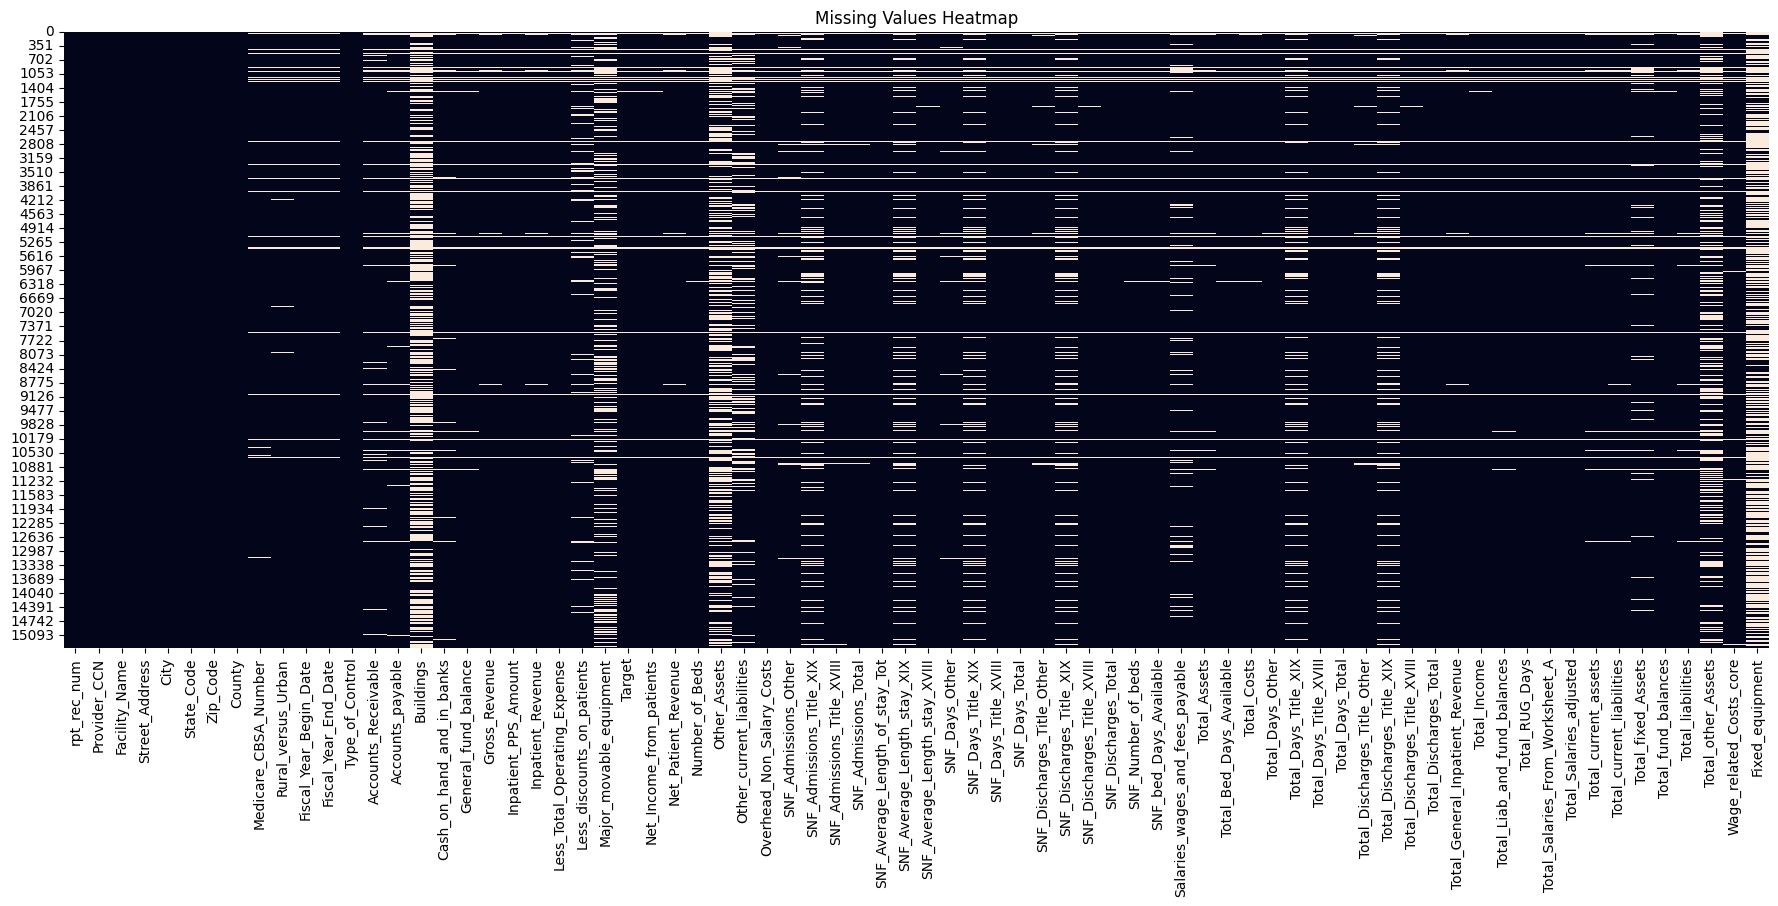

In [381]:

plt.figure(figsize=(22, 8))
sns.heatmap(df_original.isnull(), cbar=False)
plt.title("Missing Values Heatmap")


Look at this graph to see what variables you might want to see later and watch for multicollinearity or why theres NA's etc. 

# I want to Merge now and Make a Master Data Table for this Table with the years. 

Append the years together.

## First upload other Provider datasets

In [382]:
df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")
df15.sample(5)

C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16176\2000465137.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv("../Datasets_P1/2015_CostReport.csv")


,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
6555,1141672,56037,PACIFIC HILLS MANOR,370 NOBLE COURT,MORGAN HILL,CA,95037,SANTA CLARA,41940.0,U,1/1/2015,12/31/2015,4,2809520.0,-46956.0,NaN,2000.0,18945500.0,14242154.0,5002939.0,14242154.0,11268309.0,1047079.0,357621.0,1919405.0,1926766.0,13195075.0,99.0,387212.0,229951.0,6422622.0,266.0,48.0,242.0,556.0,57.80,189.02,27.41,9187.0,18146.0,5784.0,33117.0,266.0,96.0,211.0,573.0,99.0,36135.0,369536.0,3159850.0,36135.0,2273968.0,9187.0,18146.0,5784.0,33117.0,266.0,96.0,211.0,573.0,10344124.0,1919405.0,3159850.0,5784.0,4845687.0,4845687.0,2572470.0,-15785650.0,200168.0,18945500.0,-15785650.0,387212.0,879159.0,73653.0
9143,1150815,365945,CRYSTAL CARE CENTER OF MANSFIELD,1159 WYANDOTTE AVENUE,MANSFIELD,OH,44906,RICHLAND,31900,U,1/1/2015,12/31/2015,4,899337.0,353600.0,NaN,161097.0,505123.0,6451036.0,1348025.0,6451036.0,4981326.0,1182883.0,NaN,286916.0,286827.0,5268153.0,74.0,273977.0,NaN,2995712.0,113.0,56.0,104.0,273.0,96.65,299.62,30.73,5103.0,17977.0,2919.0,25999.0,114.0,60.0,95.0,269.0,74.0,27010.0,122055.0,1514854.0,27010.0,864393.0,5103.0,17977.0,2919.0,25999.0,114.0,60.0,95.0,269.0,5425999.0,286916.0,1514854.0,2919.0,1985614.0,1985614.0,1078084.0,970508.0,71985.0,505123.0,1009731.0,364785.0,326471.0,36064.0
14694,1182204,445380,LIFE CARE CENTER OF HIXSON,5798 HIXSON HOMEPLACE,HIXSON,TN,37343,HAMILTON,16860,U,9/1/2015,8/31/2016,4,1784538.0,206553.0,NaN,3156.0,2782029.0,15886257.0,7374465.0,15886257.0,10456655.0,4422366.0,NaN,1013711.0,1007236.0,11463891.0,108.0,515250.0,179268.0,5080649.0,308.0,6.0,432.0,746.0,37.60,333.91,35.58,9603.0,3673.0,15336.0,28612.0,319.0,11.0,431.0,761.0,108.0,39528.0,263206.0,2283798.0,39528.0,3867469.0,9603.0,3673.0,15336.0,28612.0,319.0,11.0,431.0,761.0,9326115.0,1013711.0,2283798.0,15336.0,5376006.0,5376006.0,1611478.0,681040.0,132259.0,2782029.0,-498231.0,540061.0,1018744.0,242396.0
12676,1173102,495334,SHORE LIFECARE,26181 PARKSLEY ROAD,PARKSLEY,VA,23421,NORTHHAMPTON,99949,R,1/1/2015,12/31/2015,4,1279662.0,307583.0,2675465.0,-49796.0,1836960.0,11217421.0,2030248.0,11217421.0,8566171.0,3363213.0,2033201.0,-724718.0,-711963.0,7854208.0,136.0,NaN,44511.0,4891416.0,4087.0,NaN,2324.0,6411.0,44.62,NaN,33.61,2061.0,NaN,5479.0,7540.0,39.0,NaN,163.0,169.0,22.0,49640.0,52968.0,2438439.0,49640.0,1020868.0,6734.0,27744.0,5479.0,39957.0,39.0,29.0,163.0,231.0,9392342.0,-702349.0,2438439.0,5479.0,3674755.0,3670559.0,1209273.0,526258.0,1229166.0,1836960.0,601479.0,NaN,620327.0,863408.0
5192,1140082,165451,HAWKEYE CARE

In [383]:
df16 = pd.read_csv("../Datasets_P1/2016_CostReport.csv")
df16.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
6239,1173789,675387,CARTHAGE LTC PARTNERS INC.,501 COTTAGE ROAD,CARTHAGE,TX,75633,PANOLA,99945.0,R,1/1/2016,12/31/2016,4,793612.0,566452.0,NaN,-5393.0,59398.0,4846333.0,1114697.0,4846333.0,4149097.0,598620.0,19245.0,102408.0,98616.0,4247713.0,108.0,NaN,NaN,2191432.0,33.0,74.0,42.0,149.0,156.68,246.01,58.05,2385.0,18697.0,2264.0,23346.0,34.0,76.0,39.0,149.0,108.0,39528.0,76560.0,801324.0,39528.0,651454.0,2385.0,18697.0,2264.0,23346.0,34.0,76.0,39.0,149.0,3927780.0,102408.0,801324.0,2264.0,1957665.0,1957665.0,788219.0,741926.0,13105.0,59398.0,741926.0,NaN,223249.0,19344.0
6482,1174140,676210,SUMMER PLACE NURSING & REHABILITATIO,2485 SOUTH MAJOR DRIVE,BEAUMONT,TX,77707,JEFFERSON,13140.0,U,1/1/2016,12/31/2016,4,1638680.0,362100.0,NaN,-2937.0,2311827.0,20344159.0,4030067.0,20344159.0,9803018.0,9396448.0,22552.0,1205703.0,1144693.0,10947711.0,132.0,NaN,115532.0,6316642.0,218.0,62.0,247.0,527.0,82.73,243.06,40.42,11426.0,24792.0,8043.0,44261.0,234.0,102.0,199.0,535.0,132.0,48312.0,178288.0,2195863.0,48312.0,2016131.0,11426.0,24792.0,8043.0,44261.0,234.0,102.0,199.0,535.0,13099740.0,1205703.0,2195863.0,8043.0,3486376.0,3486376.0,1637796.0,-322484.0,233856.0,2311827.0,-115964.0,324211.0,539926.0,101643.0
12010,1201818,55441,IVY CREEK HEALTHCARE & WELLNESS,115 BRIDGE STREET,SAN GABRIEL,CA,91775,LOS ANGELES,31084.0,U,1/1/2016,12/31/2016,4,3202869.0,2458373.0,NaN,386897.0,1557086.0,12649565.0,4905615.0,12649565.0,9549900.0,2839898.0,79871.0,384475.0,259767.0,9809667.0,98.0,250210.0,1092.0,5953684.0,40.0,3.0,201.0,244.0,138.87,873.55,61.26,1033.0,25333.0,7658.0,34024.0,91.0,29.0,125.0,245.0,98.0,35868.0,116637.0,4000554.0,35868.0,1989281.0,1033.0,25333.0,7658.0,34024.0,91.0,29.0,125.0,245.0,6833073.0,384475.0,4000554.0,7658.0,3596216.0,3596216.0,3424091.0,2643468.0,326253.0,1557086.0,2443468.0,250210.0,971425.0,36295.0
10007,1183565,525421,LINDENGROVE MENOMONEE FALLS,W180 N 8071 TOWN HALL ROAD,MENOMONEE FALLS,WI,53051,WAUKESHA,33340.0,U,7/1/2016,6/30/2017,4,6026634.0,445493.0,37213960.0,2824899.0,20669630.0,18276355.0,3682340.0,18276355.0,11094483.0,6873557.0,13158278.0,353080.0,308315.0,11402798.0,130.0,2116244.0,585762.0,4720962.0,389.0,11.0,366.0,766.0,54.31,919.44,22.21,15358.0,16550.0,7084.0,38992.0,381.0,18.0,319.0,718.0,130.0,47450.0,2956201.0,52244065.0,47450.0,2247202.0,15358.0,16550.0,7084.0,38992.0,381.0,18.0,319.0,718.0,13157503.0,353080.0,52244065.0,7084.0,6373521.0,6373521.0,9513626.0,5062456.0,29838994.0,20669630.0,31574435.0,1289144

In [384]:
df17 = pd.read_csv("../Datasets_P1/2017_CostReport.csv")
df17.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
9181,1216229,205185,MAINE VETERANS HOMES - BANGOR,44 HOGAN ROAD,BANGOR,ME,4401,PENOBSCOT,12620.0,U,7/1/2017,6/30/2018,4,4746781.0,2264170.0,90695422.0,3848011.0,96415233.0,83528510.0,2334790.0,83528510.0,77190751.0,24057781.0,NaN,2722660.0,-17720022.0,59470729.0,150.0,18102275.0,459767.0,10291725.0,193.0,37.0,222.0,452.0,113.64,468.39,28.48,14637.0,20609.0,4415.0,39661.0,169.0,44.0,155.0,349.0,120.0,54750.0,4583176.0,142234366.0,54750.0,3576847.0,25199.0,20609.0,4415.0,50223.0,169.0,44.0,155.0,368.0,70042340.0,2828249.0,142234366.0,4415.0,7473490.0,7473490.0,11630616.0,7658520.0,74653632.0,96415233.0,45819133.0,55950118.0,3227898.0,19918551.0
13965,1247627,105484,OKEECHOBEE HEALTH CARE FACILITY,1646 HIGHWAY 441 NORTH,OKEECHOBEE,FL,34972,OKEECHOBEE,99910.0,R,1/1/2017,12/31/2017,4,1502568.0,462749.0,NaN,1495670.0,1597727.0,26170661.0,4952027.0,26170661.0,19571508.0,5942951.0,NaN,674869.0,656202.0,20227710.0,180.0,4679.0,159041.0,9133555.0,114.0,26.0,291.0,431.0,145.90,405.45,48.01,5932.0,46627.0,10179.0,62738.0,103.0,115.0,212.0,430.0,180.0,65700.0,NaN,4457577.0,65700.0,3068354.0,5932.0,46627.0,10179.0,62738.0,103.0,115.0,212.0,430.0,18647183.0,674869.0,4457577.0,10179.0,10437953.0,10241423.0,3855717.0,775273.0,597181.0,1597727.0,2859850.0,4679.0,1714794.0,484971.0
11894,1225665,375541,CHICKASHA NURSING CENTER,2700 SOUTH 9TH STREET,CHICKASHA,OK,73018,GRADY,36420.0,U,1/1/2017,12/31/2017,4,4589.0,137479.0,88163.0,21798.0,-173685.0,2502177.0,627841.0,2502177.0,2512805.0,NaN,NaN,-601.0,-10628.0,2502177.0,60.0,NaN,NaN,1136294.0,10.0,33.0,31.0,74.0,212.47,434.07,36.33,1095.0,12154.0,1199.0,14448.0,7.0,28.0,33.0,68.0,60.0,21900.0,9050.0,101408.0,21900.0,307975.0,1095.0,12154.0,1199.0,14448.0,7.0,28.0,33.0,68.0,2502177.0,-601.0,101408.0,1199.0,1376511.0,1376511.0,26387.0,275093.0,58437.0,-173685.0,275093.0,16584.0,255477.0,289197.0
10538,1219471,195494,LANDMARK HERITAGE LLC,9150 OXFORD PLACE DRIVE,BATON ROUGE,LA,70809,E. BATON ROUGE PARISH,12940.0,U,1/1/2017,12/31/2017,4,849725.0,208086.0,2740.0,468744.0,1389179.0,10903447.0,1263457.0,10388580.0,8962371.0,1010914.0,1002231.0,910131.0,930162.0,9892533.0,144.0,25389.0,100763.0,5161271.0,46.0,9.0,26.0,81.0,336.76,984.54,71.89,15500.0,27567.0,2732.0,45799.0,70.0,28.0,38.0,136.0,144.0,52560.0,154225.0,1907390.0,52560.0,1069159.0,15500.0,27567.0,2732.0,45799.0,70.0,28.0,38.0,136.0,9518004.0,948333.0,1907390.0,2732.0,3801100.0,3801100.0,1396884.0,518211.0,485117.0,1389179.0,518211.0,25389.0,558127.0,Na

In [385]:
df18 = pd.read_csv("../Datasets_P1/2018_CostReport.csv")
df18.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
4172,1238584,105511,DOS OF HIALEAH INC.,8785 NW 32ND AVENUE,MIAMI,FL,33147,MIAMI-DADE,33124.0,U,1/1/2018,12/31/2018,4,1857862.0,734191.0,1930000.0,450475.0,814238.0,15156072.0,4707878.0,15156072.0,10880114.0,3820482.0,NaN,510219.0,455476.0,11335590.0,120.0,161801.0,925532.0,6111653.0,1.0,1.0,354.0,356.0,67.53,1677.00,32.19,800.0,10062.0,9464.0,20326.0,2.0,6.0,294.0,301.0,68.0,43800.0,316731.0,10075571.0,43800.0,1019490.0,2914.0,23491.0,9464.0,35869.0,2.0,14.0,294.0,310.0,10932012.0,510219.0,10075571.0,9464.0,4768461.0,4768461.0,6378762.0,2074222.0,1565280.0,814238.0,9261333.0,2131529.0,1159216.0,1049106.0
4584,1239096,175541,CONTINUING CARE AT TALLGRASS CREEK,13800 METCALF AVENUE,OVERLAND PARK,KS,66223,JOHNSON,28140.0,U,1/1/2018,12/31/2018,4,944220.0,629026.0,91561135.0,601698.0,-22957632.0,7129880.0,2020113.0,6379940.0,34186245.0,1006313.0,3135196.0,-2266743.0,-28062678.0,6123567.0,44.0,106752264.0,125900257.0,23608180.0,140.0,NaN,181.0,321.0,45.18,NaN,24.97,10207.0,250.0,4045.0,14502.0,159.0,NaN,162.0,321.0,44.0,16060.0,1125776.0,211057637.0,16060.0,1127344.0,10207.0,250.0,4045.0,14502.0,159.0,NaN,162.0,321.0,4819275.0,-2266743.0,211057637.0,4045.0,10578065.0,10578065.0,17175638.0,127895879.0,85182399.0,-22957632.0,234015269.0,108699600.0,1228177.0,857447.0
11750,1255689,395223,THE GARDENS AT WEST SHORE,770 POPLAR CHURCH ROAD,CAMP HILL,PA,17011,DAUPHIN,25420.0,U,1/1/2018,12/31/2018,4,2847528.0,1179183.0,NaN,29951.0,-1937426.0,30141222.0,1515968.0,30141222.0,19673867.0,11510724.0,275869.0,-1041449.0,-1043369.0,18630498.0,340.0,1083.0,NaN,11254339.0,109.0,47.0,133.0,289.0,225.66,468.75,40.76,3876.0,59062.0,3179.0,66117.0,89.0,126.0,78.0,293.0,340.0,124100.0,214951.0,2196532.0,124100.0,1731070.0,3876.0,59062.0,3179.0,66117.0,89.0,126.0,78.0,293.0,23978318.0,-1041449.0,2196532.0,3179.0,8419528.0,8419528.0,1948903.0,4021010.0,246546.0,-1937426.0,4133958.0,1083.0,1607188.0,23461.0
615,1221506,245411,SHOLOM HOME EAST,740 KAY AVENUE,SAINT PAUL,MN,55102,RAMSEY,33460.0,U,10/1/2017,9/30/2018,4,1936759.0,117384.0,43340432.0,2137107.0,17560178.0,17463845.0,3828053.0,17463845.0,20481717.0,2566844.0,5386526.0,-235721.0,-5584716.0,14897001.0,118.0,NaN,282110.0,11885847.0,209.0,36.0,373.0,618.0,71.51,556.31,21.30,14270.0,17802.0,6900.0,38972.0,189.0,32.0,324.0,545.0,118.0,43070.0,681925.0,42270830.0,43070.0,2286371.0,14270.0,17802.0,6900.0,38972.0,189.0,32.0,324.0,545.0,14462080.0,-235721.0,42270830.0,6900.0,8595870.0,8595870.0,4448122.0,1277506.0,36

In [386]:
df19 = pd.read_csv("../Datasets_P1/2019_CostReport.csv")
df19.sample(5)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment
12411,1300116,215141,PATUXENT RIVER HEALTH & REHAB CENTER,14200 LAUREL PARK DRIVE,LAUREL,MD,20707,PRINCE GEORGE,47894.0,U,10/1/2018,9/30/2019,4,NaN,701926.0,NaN,3505.0,5881992.0,34983457.0,2591384.0,34983457.0,13251165.0,22176203.0,NaN,-438316.0,-443911.0,12807254.0,177.0,16638.0,911200.0,7529668.0,142.0,138.0,153.0,433.0,80.27,472.63,29.75,4171.0,32139.0,4224.0,40534.0,295.0,68.0,142.0,505.0,177.0,64605.0,241794.0,2121343.0,64605.0,2129923.0,4171.0,32139.0,4224.0,40534.0,295.0,68.0,142.0,505.0,31412398.0,-438316.0,2121343.0,4224.0,5721497.0,5721497.0,1395611.0,2193545.0,318559.0,5881992.0,-3760649.0,407173.0,529765.0,965826.0
3373,1263391,55917,ST. JUDE CARE CENTER,469 EAST NORTH STREET,MANTECA,CA,95336,SAN JOAQUIN,44700.0,U,1/1/2019,12/31/2019,4,366066.0,179305.0,NaN,84531.0,2574236.0,6692176.0,1382785.0,6396850.0,6672782.0,330843.0,93959.0,-56575.0,-311449.0,6361333.0,99.0,NaN,NaN,3547754.0,1.0,13.0,82.0,119.0,212.32,935.50,27.80,2639.0,20581.0,1779.0,26540.0,9.0,22.0,64.0,125.0,99.0,36135.0,13126.0,2770333.0,36135.0,864761.0,2639.0,20581.0,1779.0,26540.0,9.0,22.0,64.0,125.0,5640731.0,-56575.0,2770333.0,1363.0,3125028.0,3125028.0,2743358.0,196097.0,26975.0,2574236.0,196097.0,NaN,742558.0,NaN
14234,1311714,465160,RED CLIFFS HEALTHCARE INC.,1490 EAST FOREMASTER DRIVE,SAINT GEORGE,UT,84790,WASHINGTON,41100.0,U,1/1/2019,12/31/2019,4,1025105.0,155283.0,2640.0,1836.0,1757472.0,11024961.0,4704479.0,11024961.0,7530312.0,3198592.0,518319.0,296414.0,296057.0,7826369.0,60.0,6363222.0,100542.0,3475775.0,361.0,10.0,479.0,850.0,20.76,256.89,19.29,6219.0,2312.0,8681.0,17212.0,370.0,9.0,450.0,829.0,60.0,21900.0,176460.0,8593914.0,21900.0,2393962.0,6219.0,2312.0,8681.0,17212.0,370.0,9.0,450.0,829.0,5996600.0,296763.0,8593914.0,6797.0,4054537.0,4054537.0,1654517.0,473219.0,576175.0,1757472.0,6836442.0,6363222.0,656135.0,63687.0
9643,1281141,146114,LENA LIVING CENTER,1010 S LOGAN ST,LENA,IL,61048,STEPHENSON,99914.0,R,1/1/2019,12/31/2019,4,1261743.0,2039766.0,117831.0,52606.0,-2696056.0,5193584.0,1093472.0,5193584.0,4992254.0,609795.0,376144.0,-173717.0,-408465.0,4583789.0,92.0,NaN,941040.0,2779139.0,55.0,3.0,60.0,118.0,104.54,685.00,48.41,6132.0,2055.0,2372.0,10559.0,68.0,3.0,49.0,101.0,40.0,33580.0,187348.0,974805.0,33580.0,698853.0,9492.0,9887.0,2372.0,21751.0,68.0,45.0,49.0,162.0,4039413.0,-173717.0,974805.0,1698.0,2213115.0,2213115.0,787880.0,3170861.0,186925.0,-2696056.0,3670861.0,NaN,286377.0,NaN
11103,1285223,185249,4035 JACKSON MANOR REHAB & W

In [387]:
df20 = pd.read_csv("../Datasets_P1/2020_CostReport.csv")
df20.sample(5)

,rpt_rec_num,Provider CCN,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,Fiscal Year Begin Date,Fiscal Year End Date,Type of Control,Total Days Title V,Total Days Title XVIII,Total Days Title XIX,Total Days Other,Total Days Total,Number of Beds,Total Bed Days Available,Total Discharges Title V,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges Title Other,Total Discharges Total,SNF Average Length of Stay Title V,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title V,SNF Admissions Title XVIII,SNF Admissions Title XIX,SNF Admissions Other,SNF Admissions Total,SNF Days Title V,SNF Days Title XVIII,SNF Days Title XIX,SNF Days Other,SNF Days Total,SNF Number of Beds,SNF Bed Days Available,SNF Discharges Title V,SNF Discharges Title XVIII,SNF Discharges Title XIX,SNF Discharges Title Other,SNF Discharges Total,NF Number of Beds,NF Bed Days Available,NF Days Title V,NF Days Title XIX,NF Days Other,NF Days Total,NF Discharges Title V,NF Discharges Title XIX,NF Discharges Title Other,NF Discharges Total,NF Average Length of Stay Title V,NF Average Length of Stay Title XIX,NF Average Length of Stay Total,NF Admissions Title V,NF Admissions Title XIX,NF Admissions Other,NF Admissions Total,Total RUG Days,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Contract Labor,Cash on hand and in banks,Temporary Investments,Notes Receivable,Accounts Receivable,Less: Allowances for uncollectible notes and accounts receivable,Inventory,Prepaid expenses,Other current assets,Total Current Assets,Land,Land improvements,Buildings,Leasehold improvements,Fixed equipment,Major movable equipment,Minor equipment depreciable,Total fixed Assets,Investments,Other Assets,Total other Assets,Total Assets,Accounts payable,"Salaries, wages, and fees payable",Payroll taxes payable,Notes and Loans Payable (short term),Deferred income,Other current liabilities,Total current liabilities,Mortgage payable,Notes Payable,Unsecured Loans,Other long term liabilities,Total long term liabilities,Total liabilities,General fund balance,Total fund balances,Total Liabilities and fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Other Income,Total Income,Net Income,Inpatient PPS Amount,Nursing and Allied Health Education Activities,Allowable Bad Debts
4782,1302818,145497,THREE SPRINGS LODGE NURSING HOME,161 THREE SPRINGS ROAD,CHESTER,IL,62233,RANDOLPH,99914.0,R,01/01/2020,12/31/2020,4.0,NaN,916.0,12692.0,7970.0,21578.0,83.0,30378.0,NaN,22.0,33.0,41.0,96.0,NaN,41.64,54.38,52.02,NaN,23.0,8.0,15.0,46.0,NaN,916.0,435.0,1146.0,2497.0,17.0,6222.0,NaN,22.0,8.0,18.0,48.0,66.0,24156.0,NaN,12257.0,6824.0,19081.0,NaN,25.0,23.0,48.0,NaN,490.28,397.52,NaN,30.0,16.0,46.0,NaN,1911389.0,1312129.0,239409.0,250363.0,218765.0,1911389.0,NaN,550240.0,NaN,NaN,877639.0,100000.0,NaN,16458.0,NaN,1344337.0,25000.0,NaN,949082.0,NaN,NaN,348755.0,NaN,618962.0,NaN,17501.0,17501.0,1980800.0,76082.0,31583.0,2421.0,NaN,350000.0,45390.0,505476.0,NaN,NaN,NaN,NaN,1639830.0,2145306.0,-164506.0,-164506.0,1980800.0,4723665.0,4870639.0,92435.0,4963074.0,2119975.0,2843099.0,3223518.0,-380419.0,211387.0,-169032.0,-169032.0,457453.0,NaN,25315.0
8406,1310225,146101,WILLOWS HEALTH CARE,4054 ALBRIGHT LANE,ROCKFORD,IL,61103,WINNEBAGO,40420.0,U,07/01/2020,06/30/2021,2.0,NaN,2273.0,4838.0,28387.0,35498.0,127.0,46355.0,NaN,115.0,2.0,207.0,324.0,NaN,19.77,1.00,28.93,NaN,112.0,1.0,1.0,114.0,NaN,2273.0,1.0,1111.0,3385.0,20.0,7300.0,NaN,115.0,1.0,1.0,117.0,71.0,25915.0,NaN,4837.0,15597.0,20434.0,NaN,1.0,170.0,171.0,NaN,4837.00,119.50,NaN,1.0,161.0,162.0,NaN,5663320.0,5716953.0,769644.0,73

In [388]:
df21 = pd.read_csv("../Datasets_P1/2021_CostReport.csv")
df21.sample(5)

,rpt_rec_num,Provider CCN,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,Fiscal Year Begin Date,Fiscal Year End Date,Type of Control,Total Days Title V,Total Days Title XVIII,Total Days Title XIX,Total Days Other,Total Days Total,Number of Beds,Total Bed Days Available,Total Discharges Title V,Total Discharges Title XVIII,Total Discharges Title XIX,Total Discharges Title Other,Total Discharges Total,SNF Average Length of Stay Title V,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title V,SNF Admissions Title XVIII,SNF Admissions Title XIX,SNF Admissions Other,SNF Admissions Total,SNF Days Title V,SNF Days Title XVIII,SNF Days Title XIX,SNF Days Other,SNF Days Total,SNF Number of Beds,SNF Bed Days Available,SNF Discharges Title V,SNF Discharges Title XVIII,SNF Discharges Title XIX,SNF Discharges Title Other,SNF Discharges Total,NF Number of Beds,NF Bed Days Available,NF Days Title V,NF Days Title XIX,NF Days Other,NF Days Total,NF Discharges Title V,NF Discharges Title XIX,NF Discharges Title Other,NF Discharges Total,NF Average Length of Stay Title V,NF Average Length of Stay Title XIX,NF Average Length of Stay Total,NF Admissions Title V,NF Admissions Title XIX,NF Admissions Other,NF Admissions Total,Total RUG Days,Total Salaries From Worksheet A,Overhead Non-Salary Costs,Total Charges,Total Costs,Wage-related Costs (core),Total Salaries (adjusted),Contract Labor,Cash on hand and in banks,Temporary Investments,Notes Receivable,Accounts Receivable,Less: Allowances for uncollectible notes and accounts receivable,Inventory,Prepaid expenses,Other current assets,Total Current Assets,Land,Land improvements,Buildings,Leasehold improvements,Fixed equipment,Major movable equipment,Minor equipment depreciable,Total fixed Assets,Investments,Other Assets,Total other Assets,Total Assets,Accounts payable,"Salaries, wages, and fees payable",Payroll taxes payable,Notes and Loans Payable (short term),Deferred income,Other current liabilities,Total current liabilities,Mortgage payable,Notes Payable,Unsecured Loans,Other long term liabilities,Total long term liabilities,Total liabilities,General fund balance,Total fund balances,Total Liabilities and fund balances,Total General Inpatient Care Services Revenue,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Other Income,Total Income,Net Income,Inpatient PPS Amount,Nursing and Allied Health Education Activities,Allowable Bad Debts
9985,1337143,395715,WESLEY ENHANCED LIVING,6300 GREENE STREET,PHILADELPHIA,PA,19114,PHILADELPHIA,37964.0,U,07/01/2021,06/30/2022,2.0,NaN,1700.0,26444.0,11906.0,40050.0,120.0,43800.0,NaN,46.0,16.0,106.0,168.0,NaN,36.96,1652.75,238.39,NaN,60.0,10.0,97.0,167.0,NaN,1700.0,26444.0,11906.0,40050.0,120.0,43800.0,NaN,46.0,16.0,106.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9636437.0,9184886.0,2005287.0,1180254.0,2008585.0,9636437.0,19521.0,589373.0,NaN,NaN,999375.0,593163.0,NaN,46120.0,NaN,1041705.0,1100000.0,604299.0,23774034.0,NaN,1844223.0,1153535.0,NaN,17516786.0,7324904.0,-2513791.0,4811113.0,23369604.0,581272.0,2384888.0,NaN,343720.0,412185.0,202127.0,3924192.0,21313110.0,20054.0,NaN,NaN,21333164.0,25257356.0,-1887752.0,-1887752.0,23369604.0,15784610.0,22923051.0,NaN,22923051.0,6819135.0,16103916.0,18821323.0,-2717407.0,2907752.0,190345.0,-22354.0,1082418.0,NaN,32937.0
4660,1329243,225523,GLEN RIDGE NURSING CARE CENTER,120 MURRAY STREET,MEDORD,MA,02155,MIDDLESEX,15764.0,U,01/01/2021,12/31/2021,4.0,NaN,2818.0,38495.0,5805.0,47118.0,164.0,59860.0,NaN,56.0,49.0,154.0,259.0,NaN,50.32,785.61,181.92,NaN,85.0,23.0,162.0,270.0,NaN,2818.0,38495.0,5805.0,47118.0,164.0,59860.0,NaN,56.0,49.0,154.0,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Second check the type of data and number of variables and names match in each dataset

In [389]:
# CHANGE THE spaces to _ 
df20.columns = df20.columns.str.replace(' ', '_')
df21.columns = df21.columns.str.replace(' ', '_')

In [390]:
df20.sample(2)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_V,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_V,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_V,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_V,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_V,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_V,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,NF_Number_of_Beds,NF_Bed_Days_Available,NF_Days_Title_V,NF_Days_Title_XIX,NF_Days_Other,NF_Days_Total,NF_Discharges_Title_V,NF_Discharges_Title_XIX,NF_Discharges_Title_Other,NF_Discharges_Total,NF_Average_Length_of_Stay_Title_V,NF_Average_Length_of_Stay_Title_XIX,NF_Average_Length_of_Stay_Total,NF_Admissions_Title_V,NF_Admissions_Title_XIX,NF_Admissions_Other,NF_Admissions_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Temporary_Investments,Notes_Receivable,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Minor_equipment_depreciable,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Deferred_income,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Unsecured_Loans,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Outpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Nursing_and_Allied_Health_Education_Activities,Allowable_Bad_Debts
4168,1301914,155794,STRATFORD RETIREMENT LLC,2460 GLEBE STREET,CARMEL,IN,46032,HAMILTON,26900.0,U,01/01/2020,12/31/2020,4.0,NaN,780.0,NaN,3311.0,4091.0,18.0,6588.0,NaN,29.0,NaN,18.0,47.0,NaN,26.90,NaN,87.04,NaN,31.0,NaN,14.0,45.0,NaN,780.0,NaN,3311.0,4091.0,18.0,6588.0,NaN,29.0,NaN,18.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3519728.0,9935868.0,329540.0,206427.0,271879.0,3519728.0,272277.0,1341754.0,NaN,NaN,126994.0,556.0,15415.0,30288.0,36565.0,1550460.0,NaN,13597.0,1185998.0,NaN,NaN,355618.0,NaN,577165.0,NaN,5134391.0,5134391.0,7262016.0,158089.0,430667.0,NaN,NaN,NaN,742295.0,1331051.0,NaN,NaN,NaN,5513108.0,5513108.0,6844159.0,417857.0,417857.0,7262016.0,1392825.0,1722364.0,NaN,1722364.0,NaN,1722364.0,13455596.0,-11733232.0,12796457.0,1063225.0,1064063.0,451749.0,NaN,3518.0
13130,1340616,215364,FUTURE CARE CAPITAL REGION,1051 BRIGHTSEAT ROAD,LANDOVER,MD,20785,PRINCE GEORGES,47894.0,U,01/01/2020,12/31/2020,4.0,NaN,23825.0,NaN,18868.0,42693.0,150.0,54900.0,NaN,723.0,NaN,181.0,904.0,NaN,32.95,NaN,47.23,NaN,722.0,NaN,181.0,903.0,NaN,23825.0,NaN,18868.0,42693.0,150.0,54900.0,NaN,723.0,NaN,181.0,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9913205.0,13449180.0,9140956.0,5892472.0,1347085.0,9913205.0,333798.0,3638878.0,NaN,

In [391]:
df21.sample(2)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_V,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_V,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_V,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_V,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_V,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_V,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,NF_Number_of_Beds,NF_Bed_Days_Available,NF_Days_Title_V,NF_Days_Title_XIX,NF_Days_Other,NF_Days_Total,NF_Discharges_Title_V,NF_Discharges_Title_XIX,NF_Discharges_Title_Other,NF_Discharges_Total,NF_Average_Length_of_Stay_Title_V,NF_Average_Length_of_Stay_Title_XIX,NF_Average_Length_of_Stay_Total,NF_Admissions_Title_V,NF_Admissions_Title_XIX,NF_Admissions_Other,NF_Admissions_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Temporary_Investments,Notes_Receivable,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Minor_equipment_depreciable,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Deferred_income,Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Unsecured_Loans,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Outpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Nursing_and_Allied_Health_Education_Activities,Allowable_Bad_Debts
13008,1346307,235322,OAKRIDGE MANOR NURSING & REHBILITATI,3161 HILTON ROAD,FERNDALE,MI,48220,OAKLAND,47664.0,U,01/01/2021,12/31/2021,4.0,NaN,1380.0,NaN,10157.0,11537.0,64.0,23360.0,NaN,25.0,NaN,122.0,147.0,NaN,55.20,NaN,78.48,NaN,46.0,NaN,122.0,168.0,NaN,1380.0,NaN,10157.0,11537.0,64.0,23360.0,NaN,25.0,NaN,122.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1712466.0,1878450.0,650507.0,400310.0,171779.0,1712466.0,200070.0,-77285.0,NaN,NaN,1096833.0,NaN,NaN,NaN,6248.0,1025796.0,NaN,NaN,NaN,58380.0,168312.0,NaN,NaN,77745.0,NaN,NaN,NaN,1103541.0,2166101.0,82191.0,730365.0,NaN,NaN,128983.0,3107640.0,NaN,NaN,NaN,NaN,-695921.0,2411719.0,-1308178.0,-1308178.0,1103541.0,2618465.0,3268972.0,NaN,3268972.0,310098.0,2958874.0,3590916.0,-632042.0,609193.0,-22849.0,-22849.0,685483.0,NaN,NaN
12144,1343442,55115,HOLLENBECK PALMS,573 S BOYLE AVENUE,LOS ANGELES,CA,90033,LOS ANGELES,31084.0,U,07/01/2021,06/30/2022,1.0,NaN,1232.0,6847.0,59526.0,67605.0,237.0,76473.0,NaN,21.0,9.0,47.0,77.0,NaN,58.67,760.78,259.09,NaN,32.0,2.0,52.0,86.0,NaN,1232.0,6847.0,11612.0,19691.0,59.0,21535.0,NaN,21.0,9.0,46.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9168115.0,11623059.0,1083108.0,945435.0,1536360.0,9168115.0,586403.0,2953159.0,NaN,369617.0,1814161.0,24

## Drop Columns because they are entirely NULL.
I know this by looking at:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

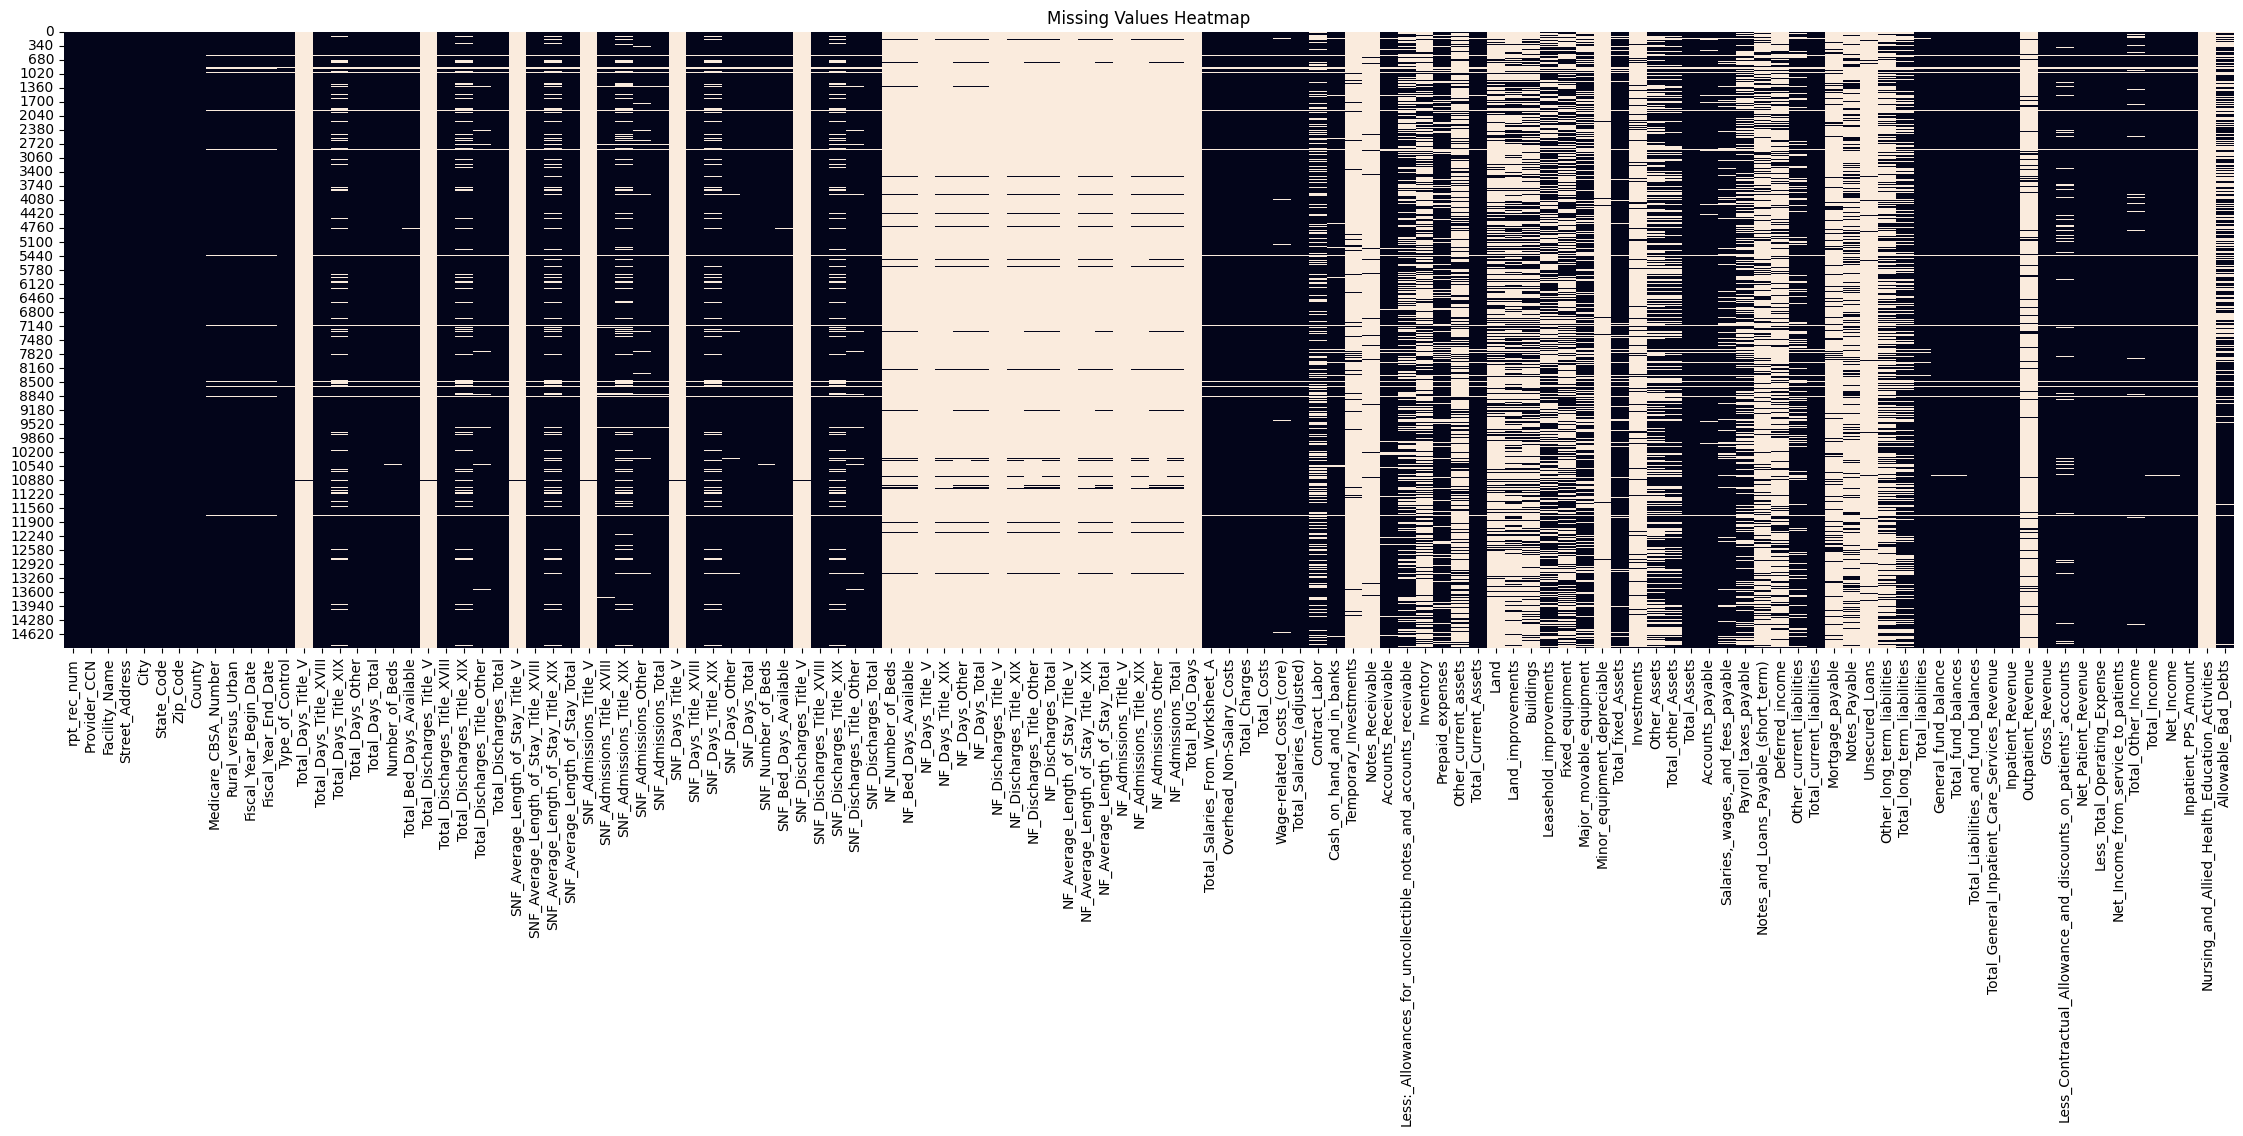

In [392]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

I am dropping these columns because they are not in df15-19 and they have less than 10 values in df20-21.

In [393]:
# List of columns to extract
columns_to_drop = [
    "rpt_rec_num", "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities", "SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df21_cleaned = df21.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df21_cleaned.sort_values(by="Provider_CCN")

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
10978,15009,BURNS NURSING HOME,701 MONROE STREET NW,RUSSELLVILLE,AL,35653,MARION,99901.0,R,07/01/2021,06/30/2022,4.0,1659.0,15606.0,1525.0,18790.0,57.0,20805.0,38.0,25.0,27.0,90.0,43.66,624.24,208.78,58.0,8.0,19.0,85.0,1659.0,15606.0,1525.0,18790.0,57.0,20805.0,38.0,25.0,27.0,90.0,NaN,2627603.0,2751774.0,936407.0,677737.0,487866.0,2627603.0,NaN,819608.0,1054496.0,365969.0,NaN,NaN,-3614.0,1504521.0,733898.0,163092.0,1150722.0,NaN,137676.0,455342.0,1390813.0,63000.0,NaN,188374.0,3083708.0,65645.0,NaN,2792.0,NaN,183358.0,251795.0,NaN,NaN,NaN,NaN,251795.0,2831913.0,2831913.0,3083708.0,4866591.0,5800011.0,5800011.0,434046.0,5365965.0,5379377.0,-13412.0,1051607.0,1038195.0,814664.0,777652.0,NaN
10094,15010,COOSA VALLEY HEALTHCARE CENTER LLC,260 W. WALNUT STREET,SYLACAUGA,AL,35150,TALLADEGA,99901.0,R,07/01/2021,06/30/2022,6.0,1392.0,21852.0,5299.0,28543.0,85.0,31025.0,84.0,56.0,108.0,248.0,16.57,390.21,115.09,101.0,43.0,104.0,248.0,1392.0,21852.0,5299.0,28543.0,85.0,31025.0,84.0,56.0,108.0,248.0,NaN,3491704.0,4111195.0,472228.0,817768.0,537711.0,3491704.0,348446.0,-96466.0,618518.0,7301.0,NaN,15022.0,NaN,529773.0,NaN,NaN,NaN,24085.0,308771.0,NaN,198582.0,NaN,1000.0,635914.0,1364269.0,249155.0,100024.0,15693.0,NaN,913206.0,1278078.0,NaN,NaN,NaN,2.0,1278080.0,86189.0,86189.0,1364269.0,6295798.0,6768026.0,6768026.0,-752815.0,7520841.0,7602899.0,-82058.0,170280.0,88222.0,-26995.0,667546.0,NaN
10784,15014,EASTVIEW REHAB & HEALTHCARE CTR,7755 4TH AVENUE SOUTH,BIRMINGHAM,AL,35206,JEFFERSON,13820.0,U,07/01/2021,06/30/2022,6.0,2525.0,20777.0,2575.0,25877.0,90.0,32850.0,30.0,35.0,23.0,88.0,84.17,593.63,294.06,13.0,8.0,29.0,50.0,2525.0,20777.0,2575.0,25877.0,90.0,32850.0,30.0,35.0,23.0,88.0,NaN,3712128.0,4833041.0,1163639.0,952960.0,734481.0,3712128.0,515640.0,149360.0,1030815.0,77601.0,NaN,NaN,11033.0,1113607.0,NaN,69090.0,356131.0,664953.0,977332.0,335632.0,632491.0,NaN,-5400.0,-1951127.0,-205029.0,658805.0,161499.0,2.0,NaN,267764.0,1088070.0,NaN,368746.0,NaN,368748.0,1456818.0,-1661847.0,-1

In [394]:
import pandas as pd

# List of columns to extract
columns_to_drop = [
    "rpt_rec_num", "Total_Days_Title_V", "Total_Discharges_Title_V", "NF_Number_of_Beds",
    "NF_Bed_Days_Available", "NF_Days_Title_V", "NF_Days_Title_XIX", "NF_Days_Other", "NF_Days_Total",
    "NF_Discharges_Title_V", "NF_Discharges_Title_XIX", "NF_Discharges_Title_Other", "NF_Discharges_Total",
    "NF_Average_Length_of_Stay_Title_V", "NF_Average_Length_of_Stay_Title_XIX", "NF_Average_Length_of_Stay_Total",
    "NF_Admissions_Title_V", "NF_Admissions_Title_XIX", "NF_Admissions_Other", "NF_Admissions_Total",
    "Temporary_Investments", "Notes_Receivable", "Minor_equipment_depreciable", "Deferred_income", "Unsecured_Loans", 
    "Outpatient_Revenue", "Nursing_and_Allied_Health_Education_Activities","SNF_Average_Length_of_Stay_Title_V", "SNF_Admissions_Title_V", "SNF_Days_Title_V", "SNF_Discharges_Title_V"

]

# Drop the specified columns
df20_cleaned = df20.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df20_cleaned.sort_values(by="Provider_CCN")

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
7834,15009,BURNS NURSING HOME,701 MONROE STREET,RUSSELVILLE,AL,35653,FRANKLIN,99901.0,R,07/01/2020,06/30/2021,4.0,1651.0,13119.0,4231.0,19001.0,57.0,20805.0,36.0,13.0,44.0,93.0,45.86,1009.15,204.31,57.0,8.0,35.0,100.0,1651.0,13119.0,4231.0,19001.0,57.0,20805.0,36.0,13.0,44.0,93.0,NaN,2535925.0,2562692.0,922882.0,622552.0,469560.0,2514719.0,NaN,1008456.0,907855.0,142446.0,NaN,300.0,NaN,1876472.0,733898.0,163092.0,1121975.0,NaN,135774.0,434867.0,1432659.0,63000.0,NaN,63000.0,3372131.0,119729.0,25789.0,2.0,521425.0,-9958.0,1364134.0,NaN,NaN,NaN,NaN,1364134.0,2007997.0,2007997.0,3372131.0,4615682.0,5538564.0,5538564.0,320626.0,5217938.0,5098617.0,119321.0,73103.0,192424.0,192424.0,782082.0,NaN
7374,15010,COOSA VALLEY HEALTHCARE CENTER LLC,260 W. WALNUT STREET,SYLACAUGA,AL,35150,TALLADEGA,99901.0,R,07/01/2020,06/30/2021,6.0,1351.0,20655.0,3796.0,25802.0,85.0,31025.0,57.0,71.0,84.0,212.0,23.70,290.92,121.71,75.0,56.0,84.0,215.0,1351.0,20655.0,3796.0,25802.0,85.0,31025.0,57.0,71.0,84.0,212.0,NaN,3271047.0,3761505.0,400058.0,617520.0,583480.0,3271047.0,283587.0,7026.0,647835.0,67156.0,NaN,15953.0,NaN,604738.0,NaN,NaN,NaN,8000.0,233157.0,NaN,162655.0,NaN,1000.0,415865.0,1183258.0,278211.0,108215.0,25755.0,NaN,657893.0,1070074.0,NaN,NaN,NaN,NaN,1070074.0,113184.0,113184.0,1183258.0,5582320.0,5982378.0,5982378.0,-750003.0,6732381.0,7032552.0,-300171.0,1259859.0,959688.0,573936.0,603001.0,NaN
7341,15014,EASTVIEW REHAB & HEALTHCARE CTR,7755 4TH AVENUE SOUTH,BIRMINGHAM,AL,35206,JEFFERSON,13820.0,U,07/01/2020,06/30/2021,6.0,1623.0,21724.0,2015.0,25362.0,90.0,32850.0,7.0,50.0,20.0,77.0,231.86,434.48,329.38,20.0,23.0,27.0,70.0,1623.0,21724.0,2015.0,25362.0,90.0,32850.0,7.0,50.0,20.0,77.0,NaN,3629744.0,4789901.0,1164786.0,913112.0,881156.0,3629744.0,498957.0,236862.0,925770.0,361328.0,NaN,NaN,11033.0,812337.0,NaN,69090.0,356131.0,626280.0,946790.0,335632.0,707670.0,NaN,NaN,NaN,1520007.0,650310.0,150588.0,3271.0,NaN,257508.0,1061677.0,NaN,612036.0,NaN,1997764.0,3059441.0,-1539434.0,-1539434.0,1

In [395]:
# Find columns in df1 but not in df2
cols_in_df1_not_df2 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df2_not_df1 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in df1 but not in df2:", cols_in_df1_not_df2)
print("Columns in df2 but not in df1:", cols_in_df2_not_df1)


Columns in df1 but not in df2: ['Leasehold_improvements', 'Overhead_Non-Salary_Costs', 'Total_long_term_liabilities', 'Investments', 'Net_Income_from_service_to_patients', 'Wage-related_Costs_(core)', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Total_Salaries_(adjusted)', 'Contract_Labor', 'SNF_Average_Length_of_Stay_Total', 'Salaries,_wages,_and_fees_payable', 'Notes_Payable', 'SNF_Number_of_Beds', 'Other_long_term_liabilities', 'Notes_and_Loans_Payable_(short_term)', 'Total_Liabilities_and_fund_balances', 'Total_Current_Assets', 'Land', 'Allowable_Bad_Debts', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Payroll_taxes_payable', 'Mortgage_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'Total_Charges', 'SNF_Bed_Days_Available', 'Prepaid_expenses', 'Inventory', 'Total_General_Inpatient_Care_Services_Revenue', 'Total_Other_Income', 'SNF_Average_Length_of_Stay_Title_XVIII', 'Other_current_assets', 'Land_improvements']
Columns in df2 but not

Columns in df1 but not in df2: ['Total_Charges', 'Total_long_term_liabilities', 'Other_long_term_liabilities', 'SNF_Average_Length_of_Stay_Total', 'Notes_and_Loans_Payable_(short_term)', 'Total_Current_Assets', 'Land', 'Total_Salaries_(adjusted)', 'Leasehold_improvements', 'Overhead_Non-Salary_Costs', 'Contract_Labor', 'Total_Other_Income', 'Allowable_Bad_Debts', 'Salaries,_wages,_and_fees_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'Investments', 'SNF_Bed_Days_Available', 'Net_Income_from_service_to_patients', 'Total_Liabilities_and_fund_balances', 'Total_General_Inpatient_Care_Services_Revenue', 'Mortgage_payable', 'Notes_Payable', 'Less:_Allowances_for_uncollectible_notes_and_accounts_receivable', 'Inventory', 'Land_improvements', 'SNF_Average_Length_of_Stay_Title_XVIII', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Other_current_assets', 'Payroll_taxes_payable', 'SNF_Number_of_Beds', 'Wage-related_Costs_(core)', 'Prepaid_expenses']


Columns in df2 but not in df1: ['Net_Income_from_patients', 'Wage_related_Costs_core', 'SNF_Number_of_beds', 'Total_current_assets', 'Total_Liab_and_fund_balances', 'Salaries_wages_and_fees_payable', 'Total_General_Inpatient_Revenue', 'Less_discounts_on_patients', 'Total_Salaries_adjusted', 'SNF_Average_Length_of_stay_Tot', 'Overhead_Non_Salary_Costs', 'SNF_Average_Length_stay_XVIII', 'rpt_rec_num', 'SNF_Average_Length_stay_XIX', 'SNF_bed_Days_Available']

## Missing variable analysis
We have identified 27 columns that are in df20 and df21 but not in df15-19. 

We need to determine what to do for each one. 

The options are: 

See if calculatable from another column and do it in 2015-2019.

See if correlated and maybe drop if not at all. 

See if there is a statistical significance from the target varaible(s).

Possibly make another dataset with the (on the edge) columns.

Determine if the varaible is "universal" and can appy to every year.

### TOTAL_CHARGES
We are analysing what to do with total_charges

In [396]:
import pandas as pd

# List of columns to keep
columns_to_keep = [
    "Total_Charges", "Total_Costs","Inpatient_Revenue", "Gross_Revenue", 
    "Total_General_Inpatient_Care_Services_Revenue", "Net_Patient_Revenue", 
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",  
    "Less_Total_Operating_Expense", "Net_Income_from_service_to_patients",  
    "Total_Other_Income", "Total_Income", "Net_Income"
]

# Select only these columns
df_selected = df20_cleaned[columns_to_keep]

# Display the first few rows
df_selected.head()


,Total_Charges,Total_Costs,Inpatient_Revenue,Gross_Revenue,Total_General_Inpatient_Care_Services_Revenue,Net_Patient_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income
0,299558.0,195203.0,1795483.0,1795483.0,1490851.0,1083396.0,712087.0,1023062.0,60334.0,50.0,60384.0,60384.0
1,254234.0,210445.0,1286852.0,1286852.0,1032618.0,814204.0,472648.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0
2,791188.0,492172.0,1906805.0,1907688.0,1116500.0,1543399.0,364289.0,1735321.0,-191922.0,120.0,-191802.0,-191802.0
3,34477.0,42549.0,1060866.0,1060866.0,1026389.0,877453.0,183413.0,914701.0,-37248.0,349.0,-36899.0,-36899.0
4,137122.0,222656.0,2038599.0,2038599.0,1901478.0,2038599.0,NaN,1880948.0,157651.0,20.0,157671.0,157671.0


### Total Charges is not in 15-19
These other variables other than Total_Charges are present in all datasets.
I tried all the combos I could to get to Total charges by calculating it from other varaibles. There is no way. 

In [397]:

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
features = ['Inpatient_Revenue', 'Gross_Revenue', 'Total_General_Inpatient_Care_Services_Revenue', 'Net_Patient_Revenue']
target = 'Total_Charges'

# Prepare the data for training
X = df_selected_cleaned[features]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 2221854718799.4473
R-squared: 0.31279200793742357

Random Forest Regressor Model:
Mean Squared Error: 579483406567.4524
R-squared: 0.8207688266512866


In [398]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned[['Total_Charges']]  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.035781499506833014
T-statistic: 391.34042012488203
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In conclusion, total_charges cannot be directly calculated. It has about a 1% correlation with Net_Income. and it is not in datasets 2015-2019. It can be calculated using a randomforest formula based on the other columns but it has 80% accuracy. the previous years could also be calculated using the difference from 20 and 21 and linearly estimate what the previous years were, but it will not be accurate at all. Hypothesis testing for significance resulted in it being significant, but not by a lot. 

We will try adding it to the master data so it atleast is present. During cleaning and simplification, we will probably drop it especially because it has high multicollinearity with some other variables.

I will have to make the variable Total_Charges in df15 - df19.


In [399]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Total_Charges'] = np.nan
df16['Total_Charges'] = np.nan
df17['Total_Charges'] = np.nan
df18['Total_Charges'] = np.nan
df19['Total_Charges'] = np.nan


In [400]:
df19.sample(4)

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment,Total_Charges
11381,1287282,445515,NHC HEALTHCARE TULLAHOMA,1321 CEDAR LANE,TULLAHOMA,TN,37388,COFFEE,99944.0,R,1/1/2019,12/31/2019,4,1010090.0,327097.0,8430479.0,756371.0,-5738393.0,12144114.0,3820125.0,12144114.0,10296625.0,2289766.0,2207502.0,-391311.0,-442277.0,9854348.0,90.0,NaN,264484.0,6433510.0,249.0,48.0,417.0,714.0,63.59,339.51,20.55,9705.0,13241.0,8405.0,31351.0,45.0,39.0,409.0,493.0,90.0,32850.0,322764.0,-4790160.0,32850.0,2489396.0,9705.0,13241.0,8405.0,31351.0,45.0,39.0,409.0,493.0,7949398.0,-391311.0,-4790160.0,6135.0,3863115.0,3863115.0,1741736.0,948233.0,8843861.0,-5738393.0,948233.0,-15375757.0,694438.0,1237054.0,NaN
13356,1308084,145926,GARDENVIEW MANOR LLC,14792 CATLIN TILTON ROAD,DANVILLE,IL,61834,VERMILION,19180.0,U,1/1/2019,12/31/2019,4,5864254.0,10637250.0,NaN,-387706.0,-3796404.0,6858144.0,1608539.0,6858144.0,7564381.0,NaN,468946.0,-706237.0,-706237.0,6858144.0,213.0,18390.0,NaN,4464188.0,20.0,100.0,80.0,200.0,166.44,287.93,33.30,3696.0,28793.0,3130.0,35619.0,20.0,100.0,94.0,214.0,118.0,77745.0,130869.0,8040361.0,77745.0,1166363.0,3696.0,28793.0,3130.0,35619.0,20.0,100.0,94.0,214.0,6858144.0,-706237.0,8040361.0,2405.0,3100193.0,3100193.0,5841714.0,10886456.0,2180257.0,-3796404.0,11836765.0,18390.0,512063.0,368238.0,NaN
9816,1281486,55109,DRIFTWOOD HEALTHCARE CENTER- SANTA C,675 24TH AVENUE,SANTA CRUZ,CA,95062,SANTA CRUZ,42100.0,U,1/1/2019,12/31/2019,4,2019064.0,239761.0,NaN,2300.0,6337800.0,14180239.0,3787062.0,14180239.0,11815149.0,3031355.0,732378.0,-663374.0,-666265.0,11148884.0,92.0,320376.0,36307.0,7204303.0,71.0,21.0,95.0,187.0,141.71,432.87,36.46,3828.0,22509.0,3281.0,29618.0,67.0,52.0,90.0,209.0,92.0,33580.0,253852.0,2670975.0,33580.0,1595162.0,3828.0,22509.0,3281.0,29618.0,67.0,52.0,90.0,209.0,10360670.0,-663374.0,2670975.0,3281.0,4610846.0,4618346.0,1283402.0,529265.0,1067197.0,6337800.0,-3666825.0,320376.0,790539.0,356867.0,NaN
3826,1265089,285275,LANCASTER MANOR REHAB CENTER LLC,1001 SOUTH STREET,LINCOLN,NE,68502,LANCASTER,30700.0,U,1/1/2019,12/31/2019,4,1603909.0,1608228.0,NaN,112569.0,1472394.0,21755462.0,4785659.0,21755462.0,19525273.0,3011677.0,469574.0,-741920.0,-781488.0,18743785.0,293.0,NaN,290104.0,10090852.0,167.0,117.0,386.0,670.0,149.10,509.59,31.93,12232.0,57074.0,8973.0,78279.0,132.0,112.0,281.0,525.0,293.0,106945.0,732447.0,4130969.0,106945.0,2913669.0,12232.0,57074.0,8973.0,78279.0,132.0,112.0,281.0,525.0,15130146.0,-741920.0,4130969.0,7444.0,9434421.0,9434421.0,3800969.0,2658575.0,32

### Contract Labor 
It is in df20 and df21 but not the others.

In [401]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,651205.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,259658.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,707183.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,NaN,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,1021337.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,142619.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,120.0,-191802.0,-19180

In [402]:
# Define the most relevant 20 variables related to Contract_Labor
labor_related_columns = [
    "Contract_Labor",
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Total_Charges",
    "Net_Income",
    "Total_Income",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Create a new DataFrame with the selected columns
df_labor_vars = df20_cleaned[labor_related_columns]

# Display the first few rows to verify
df_labor_vars.head()


,Contract_Labor,Total_Salaries_From_Worksheet_A,Total_Salaries_(adjusted),Wage-related_Costs_(core),Overhead_Non-Salary_Costs,Total_Costs,Total_Charges,Net_Income,Total_Income,Net_Patient_Revenue,Total_Days_Total,Total_Discharges_Total,SNF_Days_Total,SNF_Admissions_Total,SNF_Discharges_Total,SNF_Number_of_Beds,Total_Bed_Days_Available,Total_fixed_Assets,Total_Assets,Payroll_taxes_payable
0,136024.0,371857.0,371857.0,79053.0,651205.0,195203.0,299558.0,60384.0,60384.0,1083396.0,2921.0,57.0,2921.0,58.0,57.0,100.0,3100.0,35976.0,14400312.0,NaN
1,156009.0,369008.0,369008.0,60217.0,707183.0,210445.0,254234.0,-261181.0,-261181.0,814204.0,3404.0,26.0,3404.0,29.0,26.0,66.0,3894.0,NaN,-278550.0,-337340.0
2,17352.0,713984.0,713984.0,83667.0,1021337.0,492172.0,791188.0,-191802.0,-191802.0,1543399.0,2227.0,51.0,2227.0,138.0,51.0,38.0,3382.0,99168.0,2817453.0,NaN
3,NaN,324450.0,324450.0,33821.0,590251.0,42549.0,34477.0,-36899.0,-36899.0,877453.0,5425.0,18.0,5425.0,10.0,18.0,123.0,7749.0,484549.0,3176256.0,26575.0
4,NaN,844993.0,844993.0,103797.0,1035955.0,222656.0,137122.0,157671.0,157671.0,2038599.0,5874.0,30.0,5874.0,26.0,30.0,118.0,7198.0,334401.0,16961403.0,-177.0


I cannot find a way to calculate it or a trend. 

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with any NaN values
df_selected_cleaned = df_labor_vars.dropna()

# Assuming df_selected is your dataset
# Define features and target variable
target = 'Contract_Labor'
labor_columns = [
    "Total_Salaries_From_Worksheet_A",
    "Total_Salaries_(adjusted)",
    "Wage-related_Costs_(core)",
    "Overhead_Non-Salary_Costs",
    "Total_Costs",
    "Net_Income",
    "Total_Charges",
    "Net_Patient_Revenue",
    "Total_Days_Total",
    "Total_Discharges_Total",
    "SNF_Days_Total",
    "SNF_Admissions_Total",
    "SNF_Discharges_Total",
    "SNF_Number_of_Beds",
    "Total_Bed_Days_Available",
    "Total_fixed_Assets",
    "Total_Assets",
    "Payroll_taxes_payable"
]

# Prepare the data for training
X = df_selected_cleaned[labor_columns]
y = df_selected_cleaned[target]

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# --- Model 2: Random Forest Regressor ---
# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_reg = rf_reg.predict(X_test)

# Calculate performance metrics for Random Forest
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Results
print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse_lin_reg}")
print(f"R-squared: {r2_lin_reg}\n")

print(f"Random Forest Regressor Model:")
print(f"Mean Squared Error: {mse_rf_reg}")
print(f"R-squared: {r2_rf_reg}")


Linear Regression Model:
Mean Squared Error: 324482208067.026
R-squared: 0.5757153184767569

Random Forest Regressor Model:
Mean Squared Error: 226795028648.15125
R-squared: 0.7034485894488274


In [404]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Contract_Labor']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Total_Charges: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Total_Charges is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.19870491294125217
T-statistic: 531.0734456139027
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


In [405]:
df_labor_vars

,Contract_Labor,Total_Salaries_From_Worksheet_A,Total_Salaries_(adjusted),Wage-related_Costs_(core),Overhead_Non-Salary_Costs,Total_Costs,Total_Charges,Net_Income,Total_Income,Net_Patient_Revenue,Total_Days_Total,Total_Discharges_Total,SNF_Days_Total,SNF_Admissions_Total,SNF_Discharges_Total,SNF_Number_of_Beds,Total_Bed_Days_Available,Total_fixed_Assets,Total_Assets,Payroll_taxes_payable
0,136024.0,371857.0,371857.0,79053.0,651205.0,195203.0,299558.0,60384.0,60384.0,1083396.0,2921.0,57.0,2921.0,58.0,57.0,100.0,3100.0,35976.0,14400312.0,NaN
1,156009.0,369008.0,369008.0,60217.0,707183.0,210445.0,254234.0,-261181.0,-261181.0,814204.0,3404.0,26.0,3404.0,29.0,26.0,66.0,3894.0,NaN,-278550.0,-337340.0
2,17352.0,713984.0,713984.0,83667.0,1021337.0,492172.0,791188.0,-191802.0,-191802.0,1543399.0,2227.0,51.0,2227.0,138.0,51.0,38.0,3382.0,99168.0,2817453.0,NaN
3,NaN,324450.0,324450.0,33821.0,590251.0,42549.0,34477.0,-36899.0,-36899.0,877453.0,5425.0,18.0,5425.0,10.0,18.0,123.0,7749.0,484549.0,3176256.0,26575.0
4,NaN,844993.0,844993.0,103797.0,1035955.0,222656.0,137122.0,157671.0,157671.0,2038599.0,5874.0,30.0,5874.0,26.0,30.0,118.0,7198.0,334401.0,16961403.0,-177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,28405.0,4620444.0,4620444.0,680814.0,7267864.0,1585761.0,1454089.0,545241.0,545241.0,11533335.0,32898.0,397.0,32898.0,295.0,397.0,107.0,39162.0,461305.0,2519888.0,NaN
14945,956956.0,6897345.0,6897345.0,1110438.0,10205508.0,1322483.0,3325030.0,-433682.0,-433682.0,16610849.0,67098.0,369.0,67098.0,360.0,369.0,240.0,87840.0,417885.0,6382624.0,NaN
14946,NaN,1217063.0,1217063.0,372070.0,935345.0,16221.0,19670.0,-511877.0,-511877.0,1640531.0,6103.0,39.0,6103.0,37.0,39.0,NaN,NaN,2000.0,256712.0,NaN
14947,255632.0,1408295.0,1408295.0,218453.0,2134249.0,363700.0,453329.0,-541814.0,-541814.0,2999135.0,10223.0,80.0,10223.0,89.0,80.0,120.0,22080.0,145033.0,1476332.0,74483.0


C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16176\2026169166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

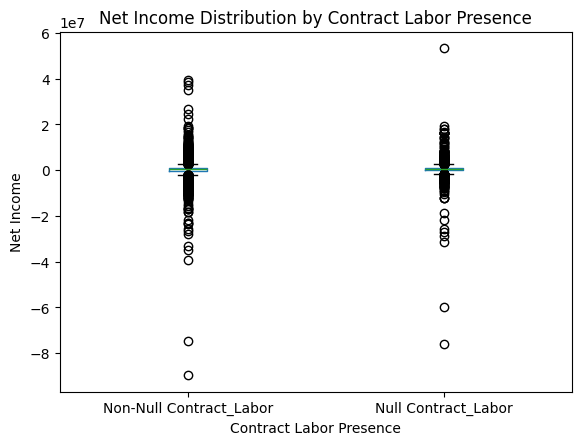

       Non-Null Contract_Labor  Null Contract_Labor
count             1.011500e+04         4.590000e+03
mean              2.412548e+05         3.723099e+05
std               2.512138e+06         2.583888e+06
min              -8.971656e+07        -7.619267e+07
25%              -3.191710e+05        -1.677922e+05
50%               2.488180e+05         3.415350e+05
75%               8.800960e+05         9.505118e+05
max               3.918180e+07         5.337325e+07
T-Test p-value: 0.0036757032018827915
Mann-Whitney U Test p-value: nan


In [406]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Contract_Labor"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Contract_Labor"].notnull()]
df_null = df_labor_vars[df_labor_vars["Contract_Labor"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Contract_Labor": df_non_null["Net_Income"].describe(),
    "Null Contract_Labor": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

Contract_Labor is significant so we should keep it.

There is an important difference between the null and the non null Contract_Labor in terms of Net_Income. 
I think it will be okay to make the contract labor NULL = 0 because that means they didn't contract labor quite simply. 

So I will put contract labor files into the df15-df19. 

In [407]:
# adding an empty Total_Charges to df15 df16 df17 df18 df19
df15['Contract_Labor'] = np.nan
df16['Contract_Labor'] = np.nan
df17['Contract_Labor'] = np.nan
df18['Contract_Labor'] = np.nan
df19['Contract_Labor'] = np.nan

### Number_of_beds
in df19 it is called SNF_Number_of_beds

In [408]:
df20_cleaned.sample(4)

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
13758,425116,EDISTO POST ACUTE,575 STONEWALL JACKSON BLVD,ORANGEBURG,SC,29115,ORANGEBURG,99942.0,R,01/01/2020,12/31/2020,5.0,4241.0,24034.0,7753.0,36028.0,113.0,41358.0,71.0,18.0,179.0,268.0,59.73,1335.22,134.43,48.0,62.0,155.0,265.0,4241.0,24034.0,7753.0,36028.0,113.0,41358.0,71.0,18.0,179.0,268.0,NaN,4285494.0,6114995.0,2104345.0,1058610.0,669140.0,4285494.0,NaN,-162.0,2481081.0,768406.0,7753.0,32661.0,NaN,494466.0,NaN,NaN,NaN,NaN,NaN,87298.0,82254.0,NaN,NaN,NaN,576720.0,128567.0,127889.0,37217.0,NaN,80110.0,373783.0,NaN,NaN,173458.0,173458.0,547241.0,29479.0,29479.0,576720.0,8159034.0,10263379.0,10263379.0,539061.0,9724318.0,10400489.0,-676171.0,611606.0,-64565.0,-64565.0,2357966.0,259901.0
1211,395612,SL VILLAGE AT SPRENKLE DRIVE,1801 FOLKEMER CIRCLE,YORK,PA,17404,YORK,49620.0,U,01/01/2020,12/31/2020,1.0,1197.0,21004.0,9727.0,31928.0,104.0,38064.0,44.0,33.0,66.0,143.0,27.20,636.48,223.27,58.0,4.0,55.0,117.0,1197.0,21004.0,9727.0,31928.0,104.0,38064.0,44.0,33.0,66.0,143.0,NaN,7843620.0,11308338.0,3008418.0,1492330.0,1691788.0,7843620.0,906567.0,208440042.0,1221340.0,NaN,NaN,NaN,NaN,209661382.0,1129154.0,377626.0,46390839.0,NaN,573984.0,4101432.0,28436494.0,NaN,1810611.0,1810611.0,239908487.0,109385.0,-79385.0,NaN,271149.0,NaN,301149.0,8646656.0,442.0,217087968.0,225735066.0,226036215.0,13872272.0,13872272.0,239908487.0,11832640.0,22181351.0,22181351.0,4534021.0,17647330.0,19151958.0,-1504628.0,1219095.0,-285533.0,-285533.0,647085.0,NaN
13294,146010,ACCOLADE HEALTHCARE OF PONTIAC,300 WEST LOWELL AVENUE,PONTIAC,IL,61764,LIVINGSTON,99914.0,R,01/01/2020,12/31/2020,6.0,3261.0,19684.0,4735.0,27680.0,97.0,35502.0,68.0,9.0,29.0,106.0,47.96,891.50,114.45,61.0,4.0,31.0,96.0,3261.0,5349.0,2034.0,10644.0,37.0,13542.0,68.0,6.0,19.0,93.0,NaN,3214639.0,3749242.0,2020843.0,728872.0,376361.0,3214639.0,422401.0,1396.0,1195139.0,149000.0,NaN,24129.0,227440.0,1747077.0,NaN,NaN,NaN,316749.0,NaN,177736.0,367794.0,NaN,470853.0,470853.0,2585724.0,707466.0,116409.0,25000.0,180588.0,137760.0,227576

In [409]:
df20_cleaned[df20_cleaned["Provider_CCN"] == 285085]

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts
8831,285085,IMMANUEL - FONTENELLE,6901 NORTH 72ND STREET,OMAHA,NE,68122-1799,DOUGLAS,36540.0,U,07/01/2020,06/30/2021,2.0,2926.0,18853.0,9342.0,31121.0,165.0,60225.0,63.0,42.0,80.0,185.0,46.44,448.88,168.22,72.0,7.0,95.0,174.0,2926.0,18853.0,9342.0,31121.0,165.0,60225.0,63.0,42.0,80.0,185.0,NaN,6993481.0,7326626.0,2566479.0,1531982.0,2027780.0,6993481.0,1950799.0,693293.0,804426.0,78300.0,NaN,NaN,NaN,1419419.0,NaN,468658.0,886651.0,NaN,403785.0,1170883.0,13835958.0,NaN,1984250.0,1984250.0,17239627.0,4120017.0,640591.0,NaN,NaN,NaN,4760608.0,NaN,NaN,27267407.0,27267407.0,32028015.0,-14788388.0,-14788388.0,17239627.0,9359615.0,9359615.0,11926094.0,1619861.0,10306233.0,14320107.0,-4013874.0,1098553.0,-2915321.0,-2915321.0,1705789.0,68642.0


In [410]:
df19[df19["Provider_CCN"] == 285085]

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_Number_of_beds,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment,Total_Charges,Contract_Labor
8896,1279698,285085,IMMANUEL - FONTENELLE,6901 NORTH 72ND STREET,OMAHA,NE,68122-1799,DOUGLAS,36540.0,U,7/1/2019,6/30/2020,4,970406.0,766442.0,886651.0,967558.0,-11873067.0,14046378.0,2050985.0,11451268.0,13450768.0,2406435.0,1110995.0,-1398259.0,-1810825.0,11639943.0,165.0,1984250.0,493619.0,6621812.0,78.0,4.0,112.0,194.0,189.17,716.41,39.64,12995.0,22925.0,3805.0,39725.0,82.0,32.0,96.0,210.0,165.0,60225.0,598374.0,5418424.0,60225.0,1505811.0,12995.0,22925.0,3805.0,39725.0,82.0,32.0,96.0,210.0,11451268.0,-1398259.0,5418424.0,1127.0,6828956.0,6828956.0,1588314.0,1858435.0,1845860.0,-11873067.0,17291491.0,1984250.0,1814900.0,403785.0,NaN,NaN


there are two columns in df20_cleaned for Number of beds. I need to see if they are the same or not.

In [411]:
import pandas as pd

# Compare Number_of_Beds with SNF_Number_of_Beds
df20_cleaned["Beds_Match"] = df20_cleaned["Number_of_Beds"] == df20_cleaned["SNF_Number_of_Beds"]

# Count matches and mismatches
match_count = df20_cleaned["Beds_Match"].sum()
mismatch_count = len(df20_cleaned) - match_count

# Print results
print(f"Matching rows: {match_count}")
print(f"Non-matching rows: {mismatch_count}")

# Get mismatched rows
mismatched_rows = df20_cleaned[~df20_cleaned["Beds_Match"]]

# Calculate the average difference for mismatched rows
average_difference = (mismatched_rows["Number_of_Beds"] - mismatched_rows["SNF_Number_of_Beds"]).abs().mean()

# Print results
print(f"Average difference in mismatched rows: {average_difference}")



Matching rows: 13040
Non-matching rows: 1909
Average difference in mismatched rows: 120.8294434470377


They are not the same 13040 are the same but 11671 arent. 

I want to compare both these columns now to the df19 one.

In [412]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14158
Non-matching 'Number_of_Beds': 1033
       Provider_CCN                      Facility_Name_20  \
21           265701                         ST. JOE MANOR   
39           235290                  METRON OF GREENVILLE   
90           165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116          185295                           DOVER MANOR   
125          366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...             ...                                   ...   
15068        465188        POINTE MEADOW HEALTHCARE  INC.   
15082        465101                 ZION HEALTHCARE  INC.   
15103         45195                  THE SPRINGS BROADWAY   
15133        676093     ROCKDALE ESTATES & REHABILITATION   
15176        675424            GREEN OAKS REHAB & NURSING   

              Street_Address_20       City_20 State_Code_20 Zip_Code_20  \
21                10 LAKE DRIVE   BONNE TERRE            MO       63628   
39            828 E. WASHINGTON    GREENVILLE   

In [413]:
import pandas as pd

# Rename datasets for clarity
df20_cleaned1 = df20_cleaned.drop_duplicates().dropna(subset=["Provider_CCN", "SNF_Number_of_Beds"])
df19_cleaned1 = df19.drop_duplicates().dropna(subset=["Provider_CCN", "Number_of_Beds"])

# Merge on Provider_CCN to align data
merged_df = df20_cleaned1.merge(df19_cleaned1, on="Provider_CCN", suffixes=("_20", "_19"))

# Compare Number_of_Beds
merged_df["Number_of_Beds_Match"] = merged_df["Number_of_Beds_20"] == merged_df["Number_of_Beds_19"]

# Count matches and mismatches
number_beds_match_count = merged_df["Number_of_Beds_Match"].sum()
number_beds_mismatch_count = len(merged_df) - number_beds_match_count

# Print results
print(f"Matching 'Number_of_Beds': {number_beds_match_count}")
print(f"Non-matching 'Number_of_Beds': {number_beds_mismatch_count}")

# Optional: Display mismatched rows
mismatched_rows = merged_df[~merged_df["Number_of_Beds_Match"]]
print(mismatched_rows)


Matching 'Number_of_Beds': 14157
Non-matching 'Number_of_Beds': 1033
       Provider_CCN                      Facility_Name_20  \
21           265701                         ST. JOE MANOR   
39           235290                  METRON OF GREENVILLE   
90           165233   REGENCY PARK NRSG & REHAB-JEFFERSON   
116          185295                           DOVER MANOR   
125          366000  SYCAMORESPRING HEALTH CARE AND REHAB   
...             ...                                   ...   
15067        465188        POINTE MEADOW HEALTHCARE  INC.   
15081        465101                 ZION HEALTHCARE  INC.   
15102         45195                  THE SPRINGS BROADWAY   
15132        676093     ROCKDALE ESTATES & REHABILITATION   
15175        675424            GREEN OAKS REHAB & NURSING   

              Street_Address_20       City_20 State_Code_20 Zip_Code_20  \
21                10 LAKE DRIVE   BONNE TERRE            MO       63628   
39            828 E. WASHINGTON    GREENVILLE   

both of the df20 Number of Beds have the same matched with df19 Number of beds which is weird. Maybe the SNF accounts for new Homes added from 19 to 20. 

in the data dict both df20 have the same definitions which doesnt help. 

I will be keeping Number_of_Beds untouched and matching. But I will add SNF_Number_of_Beds to df15-19. 

In [414]:
df15["SNF_Number_of_beds"]

0        120.0
1        114.0
2         60.0
3        141.0
4        172.0
         ...  
15397      NaN
15398    120.0
15399     99.0
15400    140.0
15401    103.0
Name: SNF_Number_of_beds, Length: 15402, dtype: float64

In [415]:
df15['SNF_Number_of_Beds'] = df15["SNF_Number_of_beds"]
df16['SNF_Number_of_Beds'] = df16["SNF_Number_of_beds"]
df17['SNF_Number_of_Beds'] = df17["SNF_Number_of_beds"]
df18['SNF_Number_of_Beds'] = df18["SNF_Number_of_beds"]
df19['SNF_Number_of_Beds'] = df19["SNF_Number_of_beds"]

In [416]:
df15 = df15.drop(columns=["SNF_Number_of_beds"])
df16 = df16.drop(columns=["SNF_Number_of_beds"])
df17 = df17.drop(columns=["SNF_Number_of_beds"])
df18 = df18.drop(columns=["SNF_Number_of_beds"])
df19 = df19.drop(columns=["SNF_Number_of_beds"])

I will have to address this in the cleaning. 

# Less:_Allowances_for_uncollectible_notes_and_accounts_receivable

In [417]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Overhead_Non-Salary_Costs,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,"Salaries,_wages,_and_fees_payable",Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,651205.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,259658.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,707183.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,NaN,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,1021337.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,142619.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,1543399.0,1735321.0,-191922.0,1

In [418]:
selected_columns = [
    "Accounts_Receivable",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable",
    "Total_Charges",
    "Total_Costs",
    "Prepaid_expenses",
    "Net_Patient_Revenue",
    "Inventory",
    "Gross_Revenue",
    "Less_Contractual_Allowance_and_discounts_on_patients'_accounts",
    "Allowable_Bad_Debts",
    "Cash_on_hand_and_in_banks",
    "Other_current_assets",
    "Total_Current_Assets",
    "Total_Assets",
    "Total_fixed_Assets",
    "Total_liabilities",
    "Total_Income",
    "Net_Income",
    "Leasehold_improvements"
]

df_selected = df20_cleaned[selected_columns]

df_labor_vars = df_selected

In [419]:
df_selected.sample(4)

,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Total_Charges,Total_Costs,Prepaid_expenses,Net_Patient_Revenue,Inventory,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Allowable_Bad_Debts,Cash_on_hand_and_in_banks,Other_current_assets,Total_Current_Assets,Total_Assets,Total_fixed_Assets,Total_liabilities,Total_Income,Net_Income,Leasehold_improvements
4663,1006673.0,NaN,1032275.0,922791.0,52458.0,5904707.0,NaN,5904707.0,NaN,29166.0,2900.0,NaN,1062031.0,2094078.0,261678.0,1680474.0,448712.0,448712.0,198609.0
8444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,729273.0,50852.0,3090477.0,1531317.0,16867.0,6014339.0,NaN,9788356.0,3774017.0,27352.0,81587.0,NaN,777307.0,4653613.0,3874835.0,9336242.0,-1512326.0,-1512326.0,2752469.0
6941,1426940.0,73317.0,2102769.0,910583.0,115719.0,7900843.0,5863.0,9762112.0,1861269.0,NaN,2050.0,NaN,1983057.0,2130878.0,147821.0,1356428.0,1039935.0,1039935.0,12825.0


In [420]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Remove rows with any NaN values
df_selected_cleaned = df_selected.dropna()

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is not significant in predicting Net_Income.")

Coefficient (Slope) for Less:_Allowances_for_uncollectible_notes_and_accounts_receivable: 0.7796521839345408
T-statistic: 84.99851583770136
P-value: 0.0
Reject the null hypothesis: Less:_Allowances_for_uncollectible_notes_and_accounts_receivable is significant in predicting Net_Income.


C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16176\3499186438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

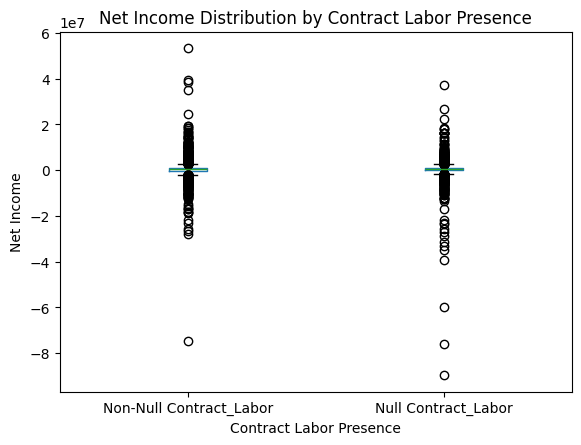

       Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
count                                       1.001700e+04                           
mean                                        3.016720e+05                           
std                                         2.231667e+06                           
min                                        -7.481245e+07                           
25%                                        -3.132080e+05                           
50%                                         2.811280e+05                           
75%                                         9.251260e+05                           
max                                         5.337325e+07                           

       Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  
count                                       4.688000e+03                      
mean                                        2.404749e+05                      
std   

In [421]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Contract_Labor_Group"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Contract_Labor_Group", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Contract Labor Presence")
plt.suptitle("")
plt.xlabel("Contract Labor Presence")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Contract_Labor", "Null Contract_Labor"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].notnull()]
df_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_non_null["Net_Income"].describe(),
    "Null Less:_Allowances_for_uncollectible_notes_and_accounts_receivable": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

It is not significant!

I will try to calculate it. 

In [422]:
import pandas as pd

# Load dataset (assuming df20_cleaned is already loaded)

# Define required columns
required_columns = [
    "Cash_on_hand_and_in_banks",
    "Accounts_Receivable",
    "Inventory",
    "Prepaid_expenses",
    "Other_current_assets",
    "Total_Current_Assets",
    "Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"
]

# Ensure required columns exist
available_columns = [col for col in required_columns if col in df20_cleaned.columns]

# Compute Estimated Allowances
df20_cleaned["Estimated_Allowances_for_Uncollectible1"] = (
    df20_cleaned["Cash_on_hand_and_in_banks"].fillna(0) +
    df20_cleaned["Accounts_Receivable"].fillna(0) +
    df20_cleaned["Inventory"].fillna(0) +
    df20_cleaned["Prepaid_expenses"].fillna(0) +
    df20_cleaned["Other_current_assets"].fillna(0) -
    df20_cleaned["Total_Current_Assets"].fillna(0)
)

# Display results with the variables used
result_df = df20_cleaned[["Estimated_Allowances_for_Uncollectible1"] + available_columns]
result_df.head(40) # Show first few rows


,Estimated_Allowances_for_Uncollectible1,Cash_on_hand_and_in_banks,Accounts_Receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable
0,44434.0,15647.0,1223466.0,65289.0,24359.0,NaN,1284327.0,135613.0
1,0.0,-15807.0,55469.0,NaN,-318469.0,NaN,-278807.0,NaN
2,129907.0,-20979.0,1533839.0,NaN,50238.0,NaN,1433191.0,4500.0
3,82318.0,700.0,2372254.0,15035.0,35995.0,NaN,2341666.0,82713.0
4,0.0,281625.0,1923803.0,NaN,111574.0,NaN,2317002.0,NaN
5,29646.0,700.0,482793.0,7083.0,15568.0,NaN,476498.0,31155.0
6,0.0,53031.0,871765.0,NaN,NaN,NaN,924796.0,NaN
7,0.0,-5942.0,362850.0,NaN,432.0,-134753.0,222587.0,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By doing a calculation I get the Estimated_Allowances_for_Uncollectible not very accurately at all. I cannot do this in the df19 bc of missing variables inventory and some others. 

It is common practice to take a % from previous years and use it to calculate the estimates Allowances. I will attempt to do this for filled in values in df20 and df21 to put into df15-19.
For the NA ones I wil have to use the average.
I will do all this in the cleaning part of this. 

For now I will just make the columns in df15-19. The difference between the NAs and non NAs is not important in terms of Net_Income. But the overall significance of the variable is important in predicting Net_Income

In [423]:
df15['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df16['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df17['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df18['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan
df19['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable'] = np.nan

# Salaries_wages_and_fees_payable

In df20 it is Salaries,_wages,_and_fees_payable and in df19 it is without hte commas. I will remove hte commas so it matches. 

In [424]:
df20_cleaned["Salaries_wages_and_fees_payable"] = df20_cleaned["Salaries,_wages,_and_fees_payable"]

In [425]:
df21_cleaned["Salaries_wages_and_fees_payable"] = df21_cleaned["Salaries,_wages,_and_fees_payable"]

In [461]:
df20_cleaned = df20_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])
df21_cleaned = df21_cleaned.drop(columns=["Salaries,_wages,_and_fees_payable"])

## Leasehold_improvements

In [426]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

# Define the independent variable (Total_Charges) and dependent variable (Net_Income)
X = df_selected_cleaned['Leasehold_improvements']  # Predictor (independent variable)
y = df_selected_cleaned['Net_Income']  # Target (dependent variable)

# Reshape X to be 2D
X = X.values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the estimated coefficient (slope) and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Calculate residuals (y - y_pred)
y_pred = model.predict(X)
residuals = y - y_pred

# Calculate standard error of the coefficient
n = len(X)
X_with_intercept = np.hstack([np.ones((n, 1)), X])  # Add intercept for the calculation
XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)  # Inverse of X'X
se_coef = np.sqrt(np.diagonal(XTX_inv) * np.var(residuals, ddof=1) / n)

# Calculate t-statistic for the coefficient
t_stat = coef / se_coef[1]  # Standard error of the coefficient at index 1 (since intercept is 0)

# Calculate p-value for the coefficient using the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# Print the coefficient, t-statistic, and p-value
print(f"Coefficient (Slope) for Leasehold_improvements: {coef}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Leasehold_improvements is significant in predicting Net_Income.")
else:
    print("Fail to reject the null hypothesis: Leasehold_improvements is not significant in predicting Net_Income.")


Coefficient (Slope) for Total_Charges: 0.05668566045155302
T-statistic: 111.88490659982084
P-value: 0.0
Reject the null hypothesis: Total_Charges is significant in predicting Net_Income.


C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16176\3594665991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labor_vars["Leasehold_improvements"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})


<Figure size 800x500 with 0 Axes>

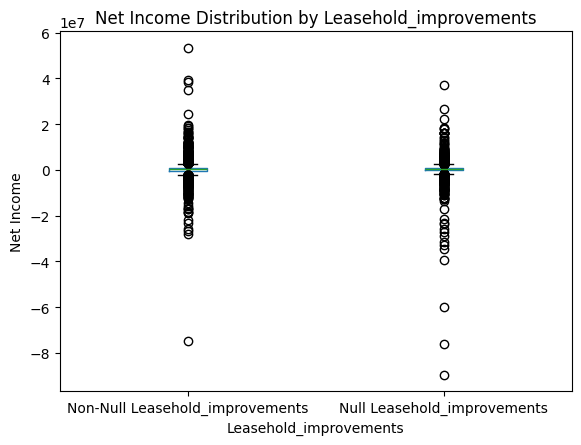

       Non-Null Leasehold_improvements  Null: Leasehold_improvements
count                     1.001700e+04                  4.688000e+03
mean                      3.016720e+05                  2.404749e+05
std                       2.231667e+06                  3.085629e+06
min                      -7.481245e+07                 -8.971656e+07
25%                      -3.132080e+05                 -1.920638e+05
50%                       2.811280e+05                  2.753810e+05
75%                       9.251260e+05                  8.593705e+05
max                       5.337325e+07                  3.709429e+07
T-Test p-value: 0.1725740209491999
Mann-Whitney U Test p-value: nan


In [433]:
import matplotlib.pyplot as plt

# Create a new column for grouping
df_labor_vars["Leasehold_improvements"] = df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull().map({True: "Null", False: "Non-Null"})

# Generate the boxplot
plt.figure(figsize=(8, 5))
df_labor_vars.boxplot(column="Net_Income", by="Leasehold_improvements", grid=False)

# Adjust labels and title
plt.title("Net Income Distribution by Leasehold_improvements")
plt.suptitle("")
plt.xlabel("Leasehold_improvements")
plt.ylabel("Net Income")
plt.xticks(ticks=[1, 2], labels=["Non-Null Leasehold_improvements", "Null Leasehold_improvements"])

plt.show()

# Separate data into two groups: with and without Contract_Labor
df_non_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].notnull()]
df_null = df_labor_vars[df_labor_vars["Less:_Allowances_for_uncollectible_notes_and_accounts_receivable"].isnull()]

# Calculate summary statistics for Net_Income
summary_stats = pd.DataFrame({
    "Non-Null Leasehold_improvements": df_non_null["Net_Income"].describe(),
    "Null: Leasehold_improvements": df_null["Net_Income"].describe()
})

print(summary_stats)

from scipy.stats import ttest_ind, mannwhitneyu

# Perform independent t-test (assumes normal distribution)
t_stat, p_value = ttest_ind(df_non_null["Net_Income"], df_null["Net_Income"], nan_policy='omit')

# Perform Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(df_non_null["Net_Income"], df_null["Net_Income"], alternative='two-sided')

print(f"T-Test p-value: {p_value}")
print(f"Mann-Whitney U Test p-value: {p_value_mwu}")

There are no varaibles in df15-19 that are close to this variable. This variable wouldnt apply universally to the other years because this is imporvements made this year. 

The Variable is important according to Hypothesis testing. The Null will be handled later in cleaning. THe nulls are not significant compared to the non Nulls when analyzing Net_Income. 

# Overhead_Non-Salary_Costs

I jsut need to change the name to match 

In [ ]:
df20_cleaned['Overhead_Non_Salary_Costs'] = df20_cleaned["Overhead_Non-Salary_Costs"]
df21_cleaned['Overhead_Non_Salary_Costs'] = df21_cleaned["Overhead_Non-Salary_Costs"]

df20_cleaned = df20_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])
df21_cleaned = df21_cleaned.drop(columns=["Overhead_Non-Salary_Costs"])


# Total_long_term_liabilities

Columns in d20 not in df19: ['Total_long_term_liabilities', 'Investments', 'Net_Income_from_service_to_patients', 'Wage-related_Costs_(core)', 'Total_Salaries_(adjusted)', 'SNF_Average_Length_of_Stay_Total', 'Salaries,_wages,_and_fees_payable', 'Notes_Payable', 'Other_long_term_liabilities', 'Beds_Match', 'Notes_and_Loans_Payable_(short_term)', 'Total_Liabilities_and_fund_balances', 'Total_Current_Assets', 'Estimated_Allowances_for_Uncollectible1', 'Land', 'Allowable_Bad_Debts', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Payroll_taxes_payable', 'Mortgage_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'SNF_Bed_Days_Available', 'Prepaid_expenses', 'Inventory', 'Total_General_Inpatient_Care_Services_Revenue', 'Total_Other_Income', 'SNF_Average_Length_of_Stay_Title_XVIII', 'Other_current_assets', 'Land_improvements']
Columns in df19 nit in df20: ['SNF_Average_Length_stay_XVIII', 'Total_Salaries_adjusted', 'Net_Income_from_patients', 'Total_current_assets', 'Less_

We can calculate this.

In [441]:
liabilities_columns = [col for col in df20_cleaned.columns if "liabilities" in col.lower()]
df_liabilities = df20_cleaned[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Total_Liabilities_and_fund_balances
0,146013.0,1509159.0,NaN,8194774.0,9703933.0,14400312.0
1,5427.0,-257980.0,257.0,259.0,-257721.0,-278550.0
2,11931.0,245384.0,NaN,3287601.0,3532985.0,2817453.0
3,354342.0,937284.0,NaN,6423181.0,7360465.0,3176256.0
4,15092370.0,16471912.0,NaN,NaN,16471912.0,16961403.0
...,...,...,...,...,...,...
14944,69940.0,1695956.0,18820.0,18820.0,1714776.0,2519888.0
14945,3910631.0,4765995.0,4946666.0,4946666.0,9712661.0,6382624.0
14946,-150.0,116946.0,NaN,NaN,116946.0,256712.0
14947,348187.0,1224546.0,NaN,793600.0,2018146.0,1476332.0


It seems that we can do Total_long_term_liabilities =  Total_Liabiltieas - Total_current_liabilties

In [443]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Total_liabilities
0,NaN,NaN,NaN
1,26837.0,94275.0,94275.0
2,-3353.0,237612.0,237612.0
3,NaN,NaN,NaN
4,101118.0,489058.0,4885852.0
...,...,...,...
15177,55205.0,1655963.0,3333399.0
15178,773118.0,6598103.0,8172906.0
15179,NaN,3460167.0,3460167.0
15180,-34927.0,415426.0,415426.0


In [444]:
df19["Total_long_term_liabilities"] = df19["Total_liabilities"] - df19["Total_current_liabilities"]


In [446]:
liabilities_columns = [col for col in df19.columns if "liabilities" in col.lower()]
df_liabilities = df19[liabilities_columns]
df_liabilities

,Other_current_liabilities,Total_current_liabilities,Total_liabilities,Total_long_term_liabilities
0,NaN,NaN,NaN,NaN
1,26837.0,94275.0,94275.0,0.0
2,-3353.0,237612.0,237612.0,0.0
3,NaN,NaN,NaN,NaN
4,101118.0,489058.0,4885852.0,4396794.0
...,...,...,...,...
15177,55205.0,1655963.0,3333399.0,1677436.0
15178,773118.0,6598103.0,8172906.0,1574803.0
15179,NaN,3460167.0,3460167.0,0.0
15180,-34927.0,415426.0,415426.0,0.0


Seems good. 

In [447]:
df18["Total_long_term_liabilities"] = df18["Total_liabilities"] - df18["Total_current_liabilities"]
df17["Total_long_term_liabilities"] = df17["Total_liabilities"] - df17["Total_current_liabilities"]
df16["Total_long_term_liabilities"] = df16["Total_liabilities"] - df16["Total_current_liabilities"]
df15["Total_long_term_liabilities"] = df15["Total_liabilities"] - df15["Total_current_liabilities"]


##  Investments

In [450]:
df15['Investments'] = np.nan
df16['Investments'] = np.nan
df17['Investments'] = np.nan
df18['Investments'] = np.nan
df19['Investments'] = np.nan

# Net_Income_from_service_to_patients

In [452]:
df15['Net_Income_from_service_to_patients'] = df15["Net_Income_from_patients"]
df16['Net_Income_from_service_to_patients'] = df16["Net_Income_from_patients"]
df17['Net_Income_from_service_to_patients'] = df17["Net_Income_from_patients"]
df18['Net_Income_from_service_to_patients'] = df18["Net_Income_from_patients"]
df19['Net_Income_from_service_to_patients'] = df19["Net_Income_from_patients"]

df15 = df15.drop(columns=["Net_Income_from_patients"])
df16 = df16.drop(columns=["Net_Income_from_patients"])
df17 = df17.drop(columns=["Net_Income_from_patients"])
df18 = df18.drop(columns=["Net_Income_from_patients"])
df19 = df19.drop(columns=["Net_Income_from_patients"])

# Wage-related_Costs_(core)

In [454]:
df15['Wage-related_Costs_(core)'] = df15["Wage_related_Costs_core"]
df16['Wage-related_Costs_(core)'] = df16["Wage_related_Costs_core"]
df17['Wage-related_Costs_(core)'] = df17["Wage_related_Costs_core"]
df18['Wage-related_Costs_(core)'] = df18["Wage_related_Costs_core"]
df19['Wage-related_Costs_(core)'] = df19["Wage_related_Costs_core"]

df15 = df15.drop(columns=["Wage_related_Costs_core"])
df16 = df16.drop(columns=["Wage_related_Costs_core"])
df17 = df17.drop(columns=["Wage_related_Costs_core"])
df18 = df18.drop(columns=["Wage_related_Costs_core"])
df19 = df19.drop(columns=["Wage_related_Costs_core"])

# Total_Salaries_(adjusted)

In [457]:
df15['Total_Salaries_(adjusted)'] = df15["Total_Salaries_adjusted"]
df16['Total_Salaries_(adjusted)'] = df16["Total_Salaries_adjusted"]
df17['Total_Salaries_(adjusted)'] = df17["Total_Salaries_adjusted"]
df18['Total_Salaries_(adjusted)'] = df18["Total_Salaries_adjusted"]
df19['Total_Salaries_(adjusted)'] = df19["Total_Salaries_adjusted"]

df15 = df15.drop(columns=["Total_Salaries_adjusted"])
df16 = df16.drop(columns=["Total_Salaries_adjusted"])
df17 = df17.drop(columns=["Total_Salaries_adjusted"])
df18 = df18.drop(columns=["Total_Salaries_adjusted"])
df19 = df19.drop(columns=["Total_Salaries_adjusted"])

# SNF_Average_Length_of_Stay_Total

In [459]:
df15['SNF_Average_Length_of_Stay_Total'] = df15["SNF_Average_Length_of_stay_Tot"]
df16['SNF_Average_Length_of_Stay_Total'] = df16["SNF_Average_Length_of_stay_Tot"]
df17['SNF_Average_Length_of_Stay_Total'] = df17["SNF_Average_Length_of_stay_Tot"]
df18['SNF_Average_Length_of_Stay_Total'] = df18["SNF_Average_Length_of_stay_Tot"]
df19['SNF_Average_Length_of_Stay_Total'] = df19["SNF_Average_Length_of_stay_Tot"]

df15 = df15.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df16 = df16.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df17 = df17.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df18 = df18.drop(columns=["SNF_Average_Length_of_stay_Tot"])
df19 = df19.drop(columns=["SNF_Average_Length_of_stay_Tot"])

# Notes_Payable
this doesnt exist in df19 nor anything like it. 

In [466]:
selected_columns = [
    "Notes_and_Loans_Payable_(short_term)", 
    "Mortgage_payable", 
    "Other_long_term_liabilities", 
    "Total_long_term_liabilities", 
    "Total_liabilities", 
    "Accounts_payable", 
    "Payroll_taxes_payable", 
    "Total_current_liabilities", 
    "Total_Assets", 
    "Net_Income", 
    "Total_Income"
]

df_selected = df20_cleaned[selected_columns]
df_selected

,Notes_and_Loans_Payable_(short_term),Mortgage_payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,Accounts_payable,Payroll_taxes_payable,Total_current_liabilities,Total_Assets,Net_Income,Total_Income
0,566616.0,8194774.0,NaN,8194774.0,9703933.0,493549.0,NaN,1509159.0,14400312.0,60384.0,60384.0
1,NaN,NaN,257.0,259.0,-257721.0,73933.0,-337340.0,-257980.0,-278550.0,-261181.0,-261181.0
2,NaN,NaN,NaN,3287601.0,3532985.0,90834.0,NaN,245384.0,2817453.0,-191802.0,-191802.0
3,NaN,5923181.0,NaN,6423181.0,7360465.0,463420.0,26575.0,937284.0,3176256.0,-36899.0,-36899.0
4,NaN,NaN,NaN,NaN,16471912.0,958326.0,-177.0,16471912.0,16961403.0,157671.0,157671.0
...,...,...,...,...,...,...,...,...,...,...,...
14944,1118578.0,NaN,18820.0,18820.0,1714776.0,500847.0,NaN,1695956.0,2519888.0,545241.0,545241.0
14945,NaN,NaN,4946666.0,4946666.0,9712661.0,371095.0,NaN,4765995.0,6382624.0,-433682.0,-433682.0
14946,NaN,NaN,NaN,NaN,116946.0,117096.0,NaN,116946.0,256712.0,-511877.0,-511877.0
14947,500000.0,NaN,NaN,793600.0,2018146.0,95290.0,74483.0,1224546.0,1476332.0,-541814.0,-541814.0


In [462]:
# Find columns in df1 but not in df2
cols_in_d20 = list(set(df20_cleaned.columns) - set(df19.columns))

# Find columns in df2 but not in df1
cols_in_df19 = list(set(df19.columns) - set(df20_cleaned.columns))

# Print results
print("Columns in d20 not in df19:", cols_in_d20)
print("Columns in df19 nit in df20:", cols_in_df19)

Columns in d20 not in df19: ['Notes_Payable', 'Other_long_term_liabilities', 'Beds_Match', 'Notes_and_Loans_Payable_(short_term)', 'Total_Liabilities_and_fund_balances', 'Total_Current_Assets', 'Estimated_Allowances_for_Uncollectible1', 'Land', 'Allowable_Bad_Debts', "Less_Contractual_Allowance_and_discounts_on_patients'_accounts", 'Payroll_taxes_payable', 'Mortgage_payable', 'SNF_Average_Length_of_Stay_Title_XIX', 'SNF_Bed_Days_Available', 'Prepaid_expenses', 'Inventory', 'Total_General_Inpatient_Care_Services_Revenue', 'Total_Other_Income', 'SNF_Average_Length_of_Stay_Title_XVIII', 'Other_current_assets', 'Land_improvements']
Columns in df19 nit in df20: ['SNF_Average_Length_stay_XVIII', 'Total_current_assets', 'Less_discounts_on_patients', 'SNF_Average_Length_stay_XIX', 'Total_General_Inpatient_Revenue', 'SNF_bed_Days_Available', 'rpt_rec_num', 'Total_Liab_and_fund_balances']


## Make a Key (Year) for each dataset

In [429]:
df19

,rpt_rec_num,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Income_from_patients,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,Overhead_Non_Salary_Costs,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Average_Length_of_stay_Tot,SNF_Average_Length_stay_XIX,SNF_Average_Length_stay_XVIII,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,SNF_bed_Days_Available,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_General_Inpatient_Revenue,Total_Income,Total_Liab_and_fund_balances,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Total_current_assets,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Wage_related_Costs_core,Fixed_equipment,Total_Charges,Contract_Labor,SNF_Number_of_Beds,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable
0,1226920,525009,CROSSROADS CARE CENTER OF EAST GREEN,600 S WEBSTER AVENUE,GREEN BAY,WI,54301,BROWN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1228236,45228,MAPLE HEALTHCARE,200 S MAPLE STREET,HAZEN,AR,72064,PRAIRIE,99904.0,R,11/1/2018,12/31/2018,4,138970.0,7613.0,NaN,-52994.0,17284.0,417808.0,28381.0,417808.0,377298.0,23226.0,6429.0,17284.0,17284.0,394582.0,70.0,10000.0,26837.0,177313.0,2.0,7.0,3.0,12.0,173.82,248.43,14.00,131.0,1739.0,42.0,1912.0,1.0,7.0,3.0,11.0,4270.0,59825.0,111559.0,4270.0,28381.0,131.0,1739.0,42.0,1912.0,1.0,7.0,3.0,11.0,340581.0,17284.0,111559.0,42.0,199985.0,199985.0,95653.0,94275.0,5906.0,17284.0,94275.0,10000.0,24783.0,NaN,NaN,NaN,70.0,NaN
2,1230331,435123,GOOD SAMARITAN SOCIETY-SELBY,4861 LINCOLN AVE,SELBY,SD,57472-0299,WALWORHT,99943.0,R,10/1/2018,11/30/2018,4,320167.0,151920.0,2528.0,85459.0,183543.0,734260.0,92469.0,719978.0,1674336.0,206443.0,NaN,-1143442.0,-1146519.0,527817.0,50.0,6247.0,-3353.0,1477583.0,16.0,8.0,22.0,46.0,56.87,187.71,68.00,1098.0,1314.0,204.0,2616.0,36.0,7.0,3.0,46.0,3050.0,88965.0,421155.0,3050.0,110922.0,1098.0,1314.0,204.0,2616.0,36.0,7.0,3.0,46.0,565600.0,-1141609.0,421155.0,204.0,196753.0,196753.0,412380.0,237612.0,2528.0,183543.0,237612.0,6247.0,56833.0,NaN,NaN,NaN,50.0,NaN
3,1232670,525232,CCC OF WEST GREEN BAY LLC,1760 SHAWANO AVENUE,GREEN BAY,WI,54303,BROWN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235138,35270,LA ESTANCIA NURSING & REHAB CENTER,15810 SOUTH 42ND STREET,PHOENIX,AZ,85048,MARICOPA,38060.0,U,11/1/2018,12/31/2018,4,1265667.0,222514.0,4242811.0,6634.0,71252.0,1884576.0,184409.0,1884576.0,1509975.0,303500.0,22493.0,71251.0,71101.0,1581076.0,192.0,-784369.0,101118.0,839732.0,37.0,15.0,8.0,60.0,102.13,282.72,27.33,813.0,5089.0,328.0,6230.0,31.0,18.0,12.0,61.0,11712.0,157352.0,4957104.0,11712.0,233121.0,813.0,5089.0,328.0,6230.0,31.0,18.0,12.0,61.0,1346040.0,71251.0,4957104.0,328.0,670243.0,670243.0,1476169.0,489058

In [463]:
df20_cleaned

,Provider_CCN,Facility_Name,Street_Address,City,State_Code,Zip_Code,County,Medicare_CBSA_Number,Rural_versus_Urban,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Total_Days_Title_XVIII,Total_Days_Title_XIX,Total_Days_Other,Total_Days_Total,Number_of_Beds,Total_Bed_Days_Available,Total_Discharges_Title_XVIII,Total_Discharges_Title_XIX,Total_Discharges_Title_Other,Total_Discharges_Total,SNF_Average_Length_of_Stay_Title_XVIII,SNF_Average_Length_of_Stay_Title_XIX,SNF_Average_Length_of_Stay_Total,SNF_Admissions_Title_XVIII,SNF_Admissions_Title_XIX,SNF_Admissions_Other,SNF_Admissions_Total,SNF_Days_Title_XVIII,SNF_Days_Title_XIX,SNF_Days_Other,SNF_Days_Total,SNF_Number_of_Beds,SNF_Bed_Days_Available,SNF_Discharges_Title_XVIII,SNF_Discharges_Title_XIX,SNF_Discharges_Title_Other,SNF_Discharges_Total,Total_RUG_Days,Total_Salaries_From_Worksheet_A,Total_Charges,Total_Costs,Wage-related_Costs_(core),Total_Salaries_(adjusted),Contract_Labor,Cash_on_hand_and_in_banks,Accounts_Receivable,Less:_Allowances_for_uncollectible_notes_and_accounts_receivable,Inventory,Prepaid_expenses,Other_current_assets,Total_Current_Assets,Land,Land_improvements,Buildings,Leasehold_improvements,Fixed_equipment,Major_movable_equipment,Total_fixed_Assets,Investments,Other_Assets,Total_other_Assets,Total_Assets,Accounts_payable,Payroll_taxes_payable,Notes_and_Loans_Payable_(short_term),Other_current_liabilities,Total_current_liabilities,Mortgage_payable,Notes_Payable,Other_long_term_liabilities,Total_long_term_liabilities,Total_liabilities,General_fund_balance,Total_fund_balances,Total_Liabilities_and_fund_balances,Total_General_Inpatient_Care_Services_Revenue,Inpatient_Revenue,Gross_Revenue,Less_Contractual_Allowance_and_discounts_on_patients'_accounts,Net_Patient_Revenue,Less_Total_Operating_Expense,Net_Income_from_service_to_patients,Total_Other_Income,Total_Income,Net_Income,Inpatient_PPS_Amount,Allowable_Bad_Debts,Beds_Match,Estimated_Allowances_for_Uncollectible1,Salaries_wages_and_fees_payable,Overhead_Non_Salary_Costs
0,75031,GLEN HILL CENTER,1 GLEN HILL ROAD,DANBURY,CT,06811,FAIRFIELD,14860.0,U,10/01/2019,10/31/2019,6.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,30.63,206.00,51.25,27.0,2.0,29.0,58.0,735.0,1648.0,538.0,2921.0,100.0,3100.0,24.0,8.0,25.0,57.0,NaN,371857.0,299558.0,195203.0,79053.0,371857.0,136024.0,15647.0,1223466.0,135613.0,65289.0,24359.0,NaN,1284327.0,NaN,518.0,NaN,10688.0,3374.0,17985.0,35976.0,NaN,13080009.0,13080009.0,14400312.0,493549.0,NaN,566616.0,146013.0,1509159.0,8194774.0,NaN,NaN,8194774.0,9703933.0,4696379.0,4696379.0,14400312.0,1490851.0,1795483.0,1795483.0,712087.0,1083396.0,1023062.0,60334.0,50.0,60384.0,60384.0,476754.0,4814.0,True,44434.0,259658.0,651205.0
1,495268,MARY WASHINGTON HEALTH CENTER,2400 MCKINNEY BLVD,COLONIAL BEACH,VA,22443,WESTMORELAND,99949.0,R,11/01/2019,12/29/2019,4.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,31.00,32.50,130.92,16.0,9.0,4.0,29.0,341.0,260.0,2803.0,3404.0,66.0,3894.0,11.0,8.0,7.0,26.0,NaN,369008.0,254234.0,210445.0,60217.0,369008.0,156009.0,-15807.0,55469.0,NaN,NaN,-318469.0,NaN,-278807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,257.0,-278550.0,73933.0,-337340.0,NaN,5427.0,-257980.0,NaN,NaN,257.0,259.0,-257721.0,-20829.0,-20829.0,-278550.0,1032618.0,1286852.0,1286852.0,472648.0,814204.0,1076191.0,-261987.0,806.0,-261181.0,-261181.0,101663.0,NaN,True,0.0,NaN,707183.0
2,295107,ADVANCED HEALTH CARE OF PARADISE,3455 PECOS-MCLEOD INTERCONNECT,LAS VEGAS,NV,89121,CLARK,29820.0,U,10/04/2019,12/31/2019,4.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,29.38,NaN,43.67,133.0,NaN,5.0,138.0,1381.0,NaN,846.0,2227.0,38.0,3382.0,47.0,NaN,4.0,51.0,NaN,713984.0,791188.0,492172.0,83667.0,713984.0,17352.0,-20979.0,1533839.0,4500.0,NaN,50238.0,NaN,1433191.0,NaN,NaN,NaN,NaN,NaN,79549.0,99168.0,NaN,1285094.0,1285094.0,2817453.0,90834.0,NaN,NaN,11931.0,245384.0,NaN,515503.0,NaN,3287601.0,3532985.0,-715532.0,-715532.0,2817453.0,1116500.0,1906805.0,1907688.0,364289.0,15

Text(0.5, 1.0, 'Missing Values Heatmap')

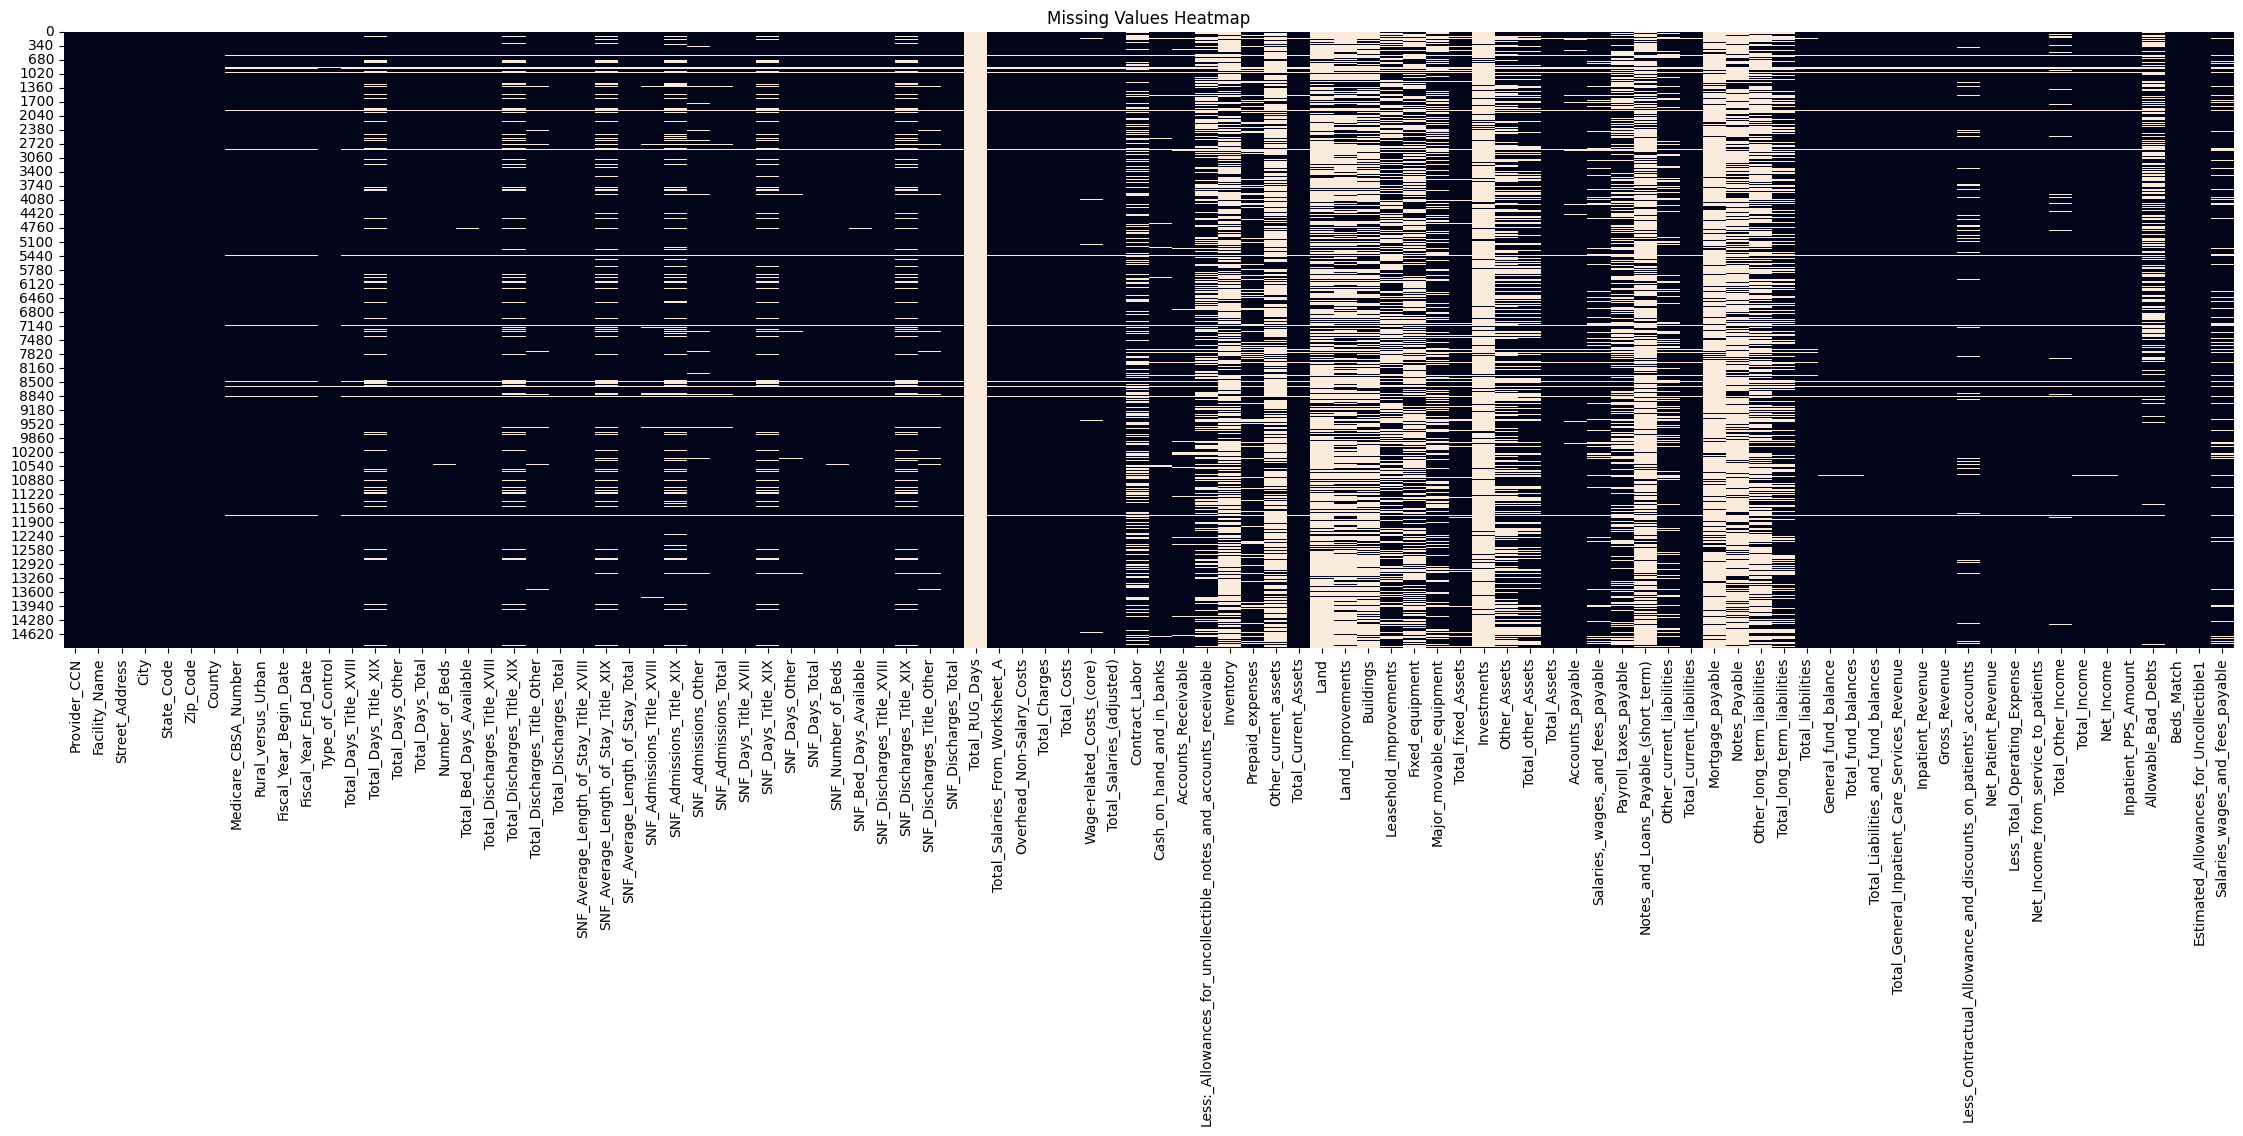

In [430]:
plt.figure(figsize=(28, 8))
sns.heatmap(df20_cleaned.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

Text(0.5, 1.0, 'Missing Values Heatmap')

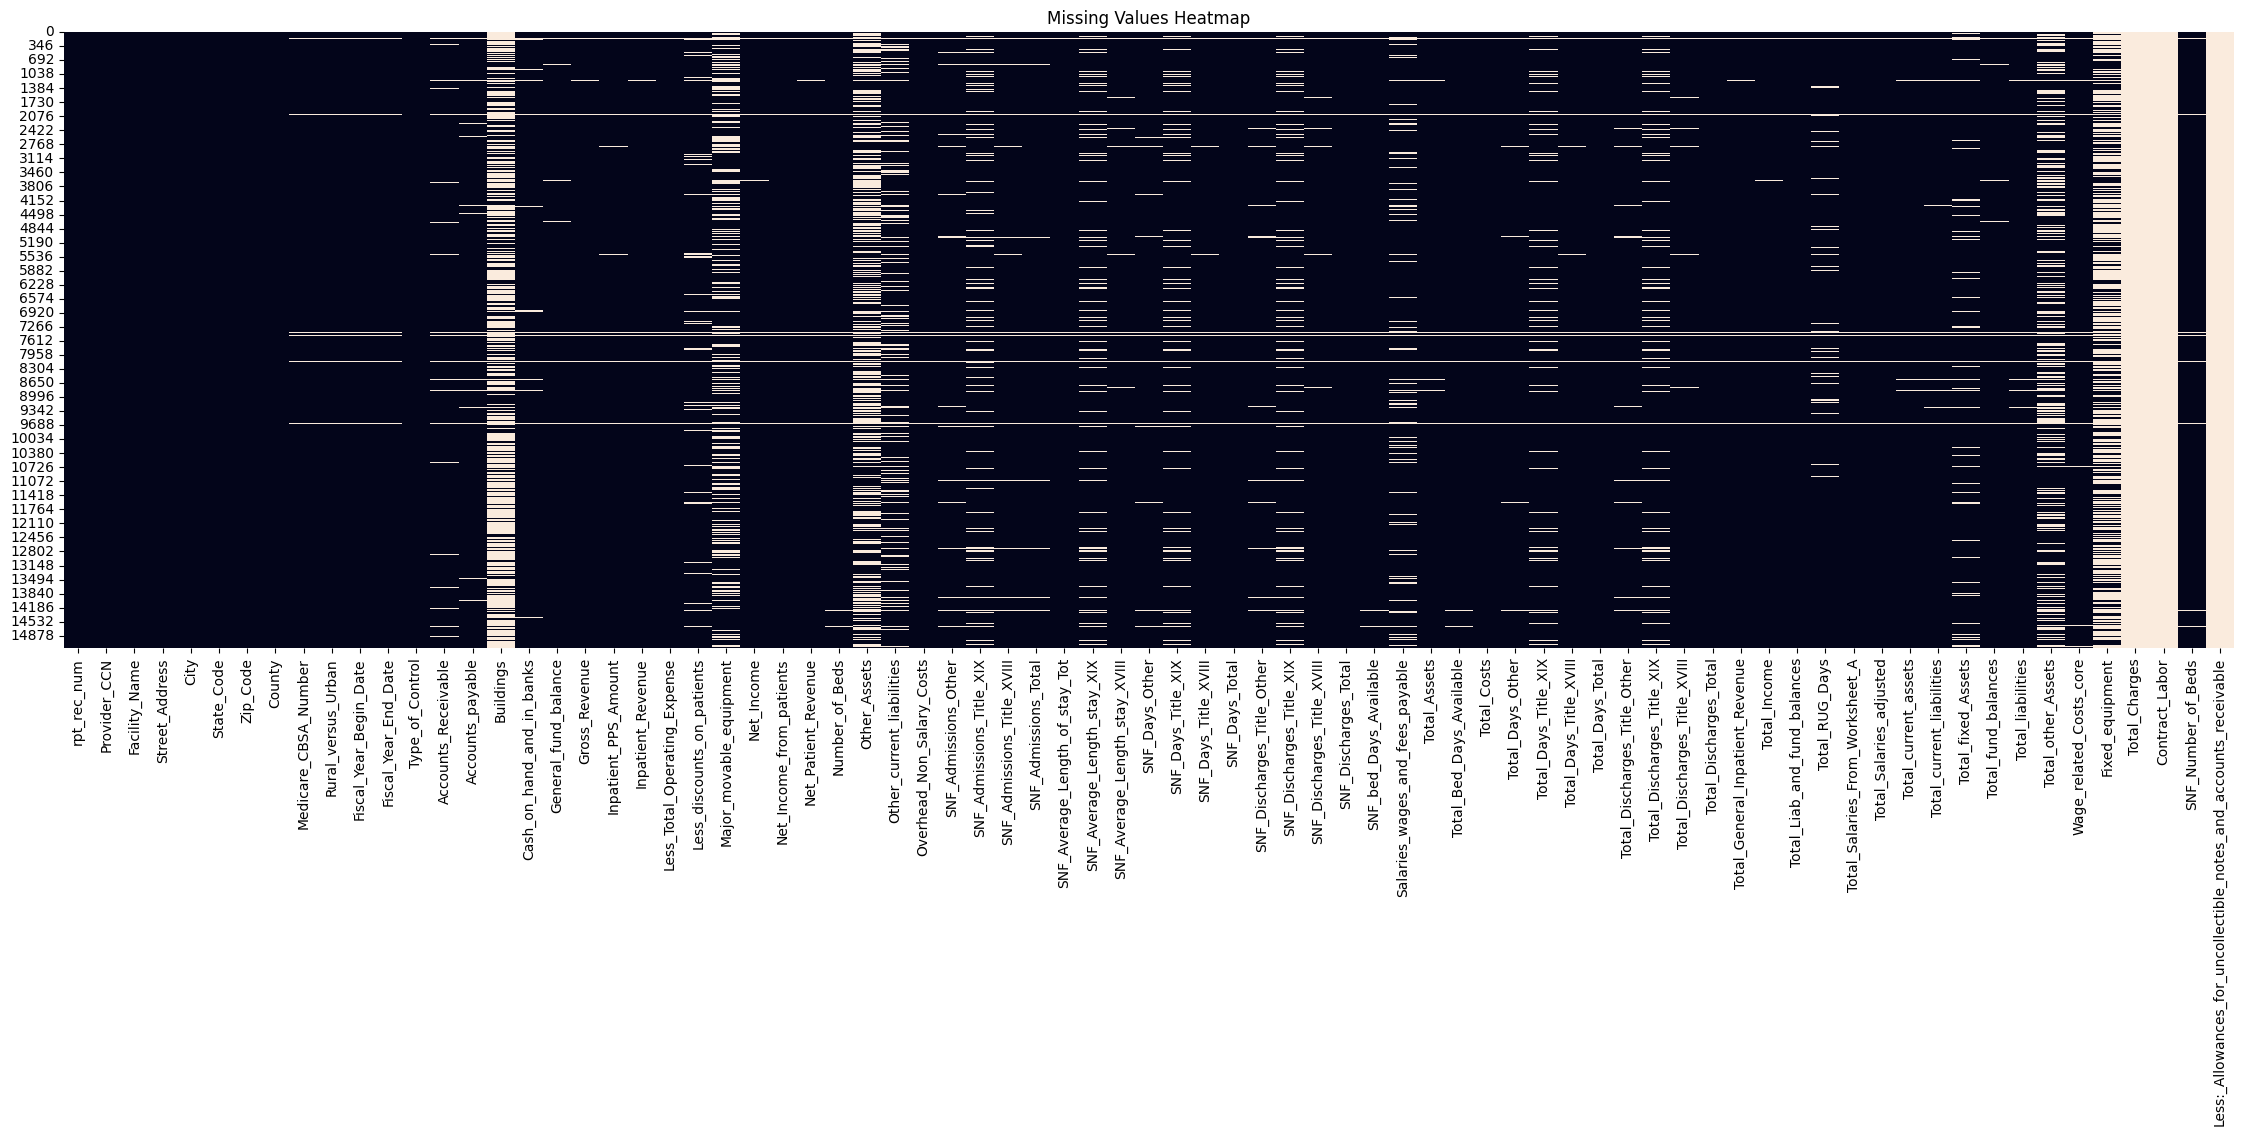

In [431]:
plt.figure(figsize=(28, 8))
sns.heatmap(df19.isnull(), cbar=False)   # and do df21
plt.title("Missing Values Heatmap")

## Third Append the years together

# HOW TO HANDLE NAs
## Keep Missingness as a Feature:

Create a binary feature indicating whether the value is missing (1 for missing, 0 otherwise). This allows the model to capture any relationship between missingness and the target.
Impute Strategically:

## Impute missing values with a meaningful approach:
Numerical Data: Use mean, median, or target-specific group means.
Categorical Data: Use the most frequent category or a new category like "Missing".
### Advanced approaches: Predict missing values using a model based on other features.
## Test Different Approaches:

Try visualizing and modeling with and without the missingness feature to assess its predictive power.

Before deciding, it’s important to check if there is any pattern in the missing data. If the missing values tend to happen for certain types of entities (e.g., smaller companies or companies in a specific industry), that might influence your decision.

## Now we split up by datatype and visualize. 

### How to deal with NA's for Object
Years can be changed with confidence. 

We can't randomly put a CBSA Number. Missing ones have a large differnce though (maybe those are medicaid then which makes sense bc medicaid does better; if so then I make it binary 0,1 for medicare vs medicaid.). 

For Rural vs Urban we can take ZIP code and if any match ZIP and has RvsU then we can put that value in the missing one. And if not then we make another category as "not defined".

Missing street address can just put "not defined" 

### FLOAT 64 NA's Analysis by %

### How to deal with NA's for Float64
Fixed Equipment (a large number) can either put a value of 0 or see if we can predict using other features. 
Building - If "total assets" correlates well with the "Buildings" variable, you could use it to estimate the missing values. For example, you could create a model (e.g., regression) to predict the "Buildings" value based on "total assets" or use the average "Buildings" value for entities with similar asset sizes.


In [432]:
print("\nModerate Missing (8% to 30%):")
moderate_missing


Moderate Missing (8% to 30%):


NameError: name 'moderate_missing' is not defined

In [ ]:
print("\nLow Missing (Less than 8%):")
low_missing


Low Missing (Less than 8%):


,Data Type,Non-Null Count,Null Count,Unique Values,Sample Value,Percent Missing (%),Target Mean (Null Rows),Target Mean (Non-Null Rows),Difference,Percent Difference (%),Correlation to Target
Net_Income,float64,14911,491,14818,311430.0,3.187898,1.135777e+05,92915.811213,-2.066186e+04,-22.237179,0.980335
SNF_Discharges_Total,float64,14917,485,1206,49.0,3.148942,-1.310709e+05,93424.813529,2.244957e+05,240.295574,0.115571
Total_Days_Other,float64,14917,485,10797,534.0,3.148942,-9.505792e+05,95241.416874,1.045821e+06,1098.073331,0.066856
SNF_Average_Length_of_stay_Tot,float64,14917,485,11636,137.14,3.148942,-1.310709e+05,93424.813529,2.244957e+05,240.295574,0.028037
General_fund_balance,float64,14918,484,14716,311430.0,3.142449,-3.473836e+05,93460.123809,4.408437e+05,471.691794,0.417262
Total_fund_balances,float64,14918,484,14717,311430.0,3.142449,-3.473836e+05,93460.123809,4.408437e+05,471.691794,0.416646
Total_Discharges_Total,float64,14919,483,1217,49.0,3.135956,2.588084e+04,93067.872523,6.718703e+04,72.191436,0.114529
Target,float64,14920,482,14830,311431.0,3.129464,NaN,92928.274799,0.000000e+00,0.000000,1.000000
Total_Costs,float64,14927,475,14887,211585.0,3.084015,-9.765885e+05,94507.639012,1.071096e+06,1133.343405,0.140984
Inpatient_PPS_Amount,float64,14931,471,14849,154022.0,3.058044,-5.968279e+05,93807.770687,6.906357e+05,736.224423,0.199580


# Data Type
Ensure the datatype is right for each.

# Make a dataset with Dummies